In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def crystalballfit(args, x):
#     df = args
    beta, m, loc, scale = args
#     print(df)
    rv = crystalball(beta = beta, m = m, loc = loc, scale = scale)
    return rv.pdf(x)

In [3]:
def lstsq_crystalballfit(args, x, y):
#     print(args, x, y)
    return crystalballfit(args, x) - y

In [4]:
def laplace_asymmetricfit(args, x):
#     df = args
    kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return rv.pdf(x) + b

In [5]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [6]:
def gammafit(args, x):
#     df = args
    a, loc, scale = args
#     print(df)
    rv = gamma(a = a, loc = loc, scale = scale)
    return rv.pdf(x)

In [7]:
def lstsq_gammafit(args, x, y):
#     print(args, x, y)
    return gammafit(args, x) - y

In [8]:
def skewnormfit(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x + d*x*x

In [9]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [10]:
def lognormfit(args, x):
#     df = args
    s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x

In [11]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [12]:
def normfit(args, x):
#     df = args
    loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x +c*x*x

In [13]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [14]:
def normfit2(args, x):
#     df = args
    loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [15]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [16]:
def halfnormfit(args, x):
#     df = args
    scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x

In [17]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [18]:
def halfnormfit2(args, x):
#     df = args
    scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return rv.pdf(x) + a + b*x

In [19]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [20]:
def halfcauchyfit(args, x):
#     df = args
    scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x

In [21]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [22]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [23]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [24]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [25]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [26]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [27]:
parent_epg = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/inb/epg/"
epg_3987 = pd.read_pickle(parent_epg + "3987" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [28]:
dvcsSimInb = epg_3987
bkgSimInb = epg_4076

## CDFT cuts

In [29]:
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]

In [30]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf((1-0.95**(1/8))/2, loc = loc, scale = scale)
    ub = norm.ppf((1+0.95**(1/8))/2, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.013525762466083058 128.02310055995585 95
[ 0.03234973  0.17754034 -0.06027195  0.32392491  1.75412836] -0.45180417782715254 0.5165036351828173 0.013525762466083058
0.0 364.8666868215008 95
0.0 503.1795787374607 95
0.0 574.0159817658486 95
0.0 570.2521476394774 95
0.0 568.662237626092 95
0.0 566.7433549459348 95
0.0 568.2909296242574 95
0.0 568.2301459822202 95
0.0 568.8325449760799 95


In [31]:
len(dvcsSimInbCDFT)

312952

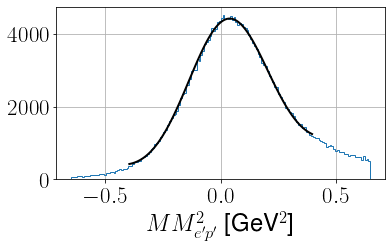

In [32]:
dvcsSimInbCDFT.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.xlabel(r"$MM^2_{e'p'}$" + " ["+GeV2+"]")
plt.show()

In [33]:
loc-3*scale

-0.5275319074220082

In [34]:
loc+3*scale

0.6008477527038993

In [35]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_ep<0.601)&(dvcsSimInbCDFT.MM2_ep>-0.528)]

In [38]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(0.5, 1.5, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.908, 0.244, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.91151985  0.24074684 -0.23182472 -0.01503173  0.2748849 ] 0.3514589548083642 1.3075131561901476 1.7858159395700568e-11
[ 0.90876894  0.22320114  0.31459555 -1.23746165  0.99071116] 0.38952545394111004 1.275902142167094 0.14822895375327916
[ 0.9076904   0.22056252  0.31277387 -1.20489711  0.99457642] 0.3945852481421278 1.2704834580627147 0.5517531468434518


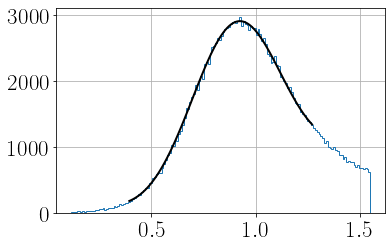

In [39]:
dvcsSimInbCDFT.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
x = np.linspace(0.5, 1.5, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [40]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

0.2460028377332415 1.5693779568779938


In [41]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_eg<1.569)&(dvcsSimInbCDFT.MM2_eg>0.246)]

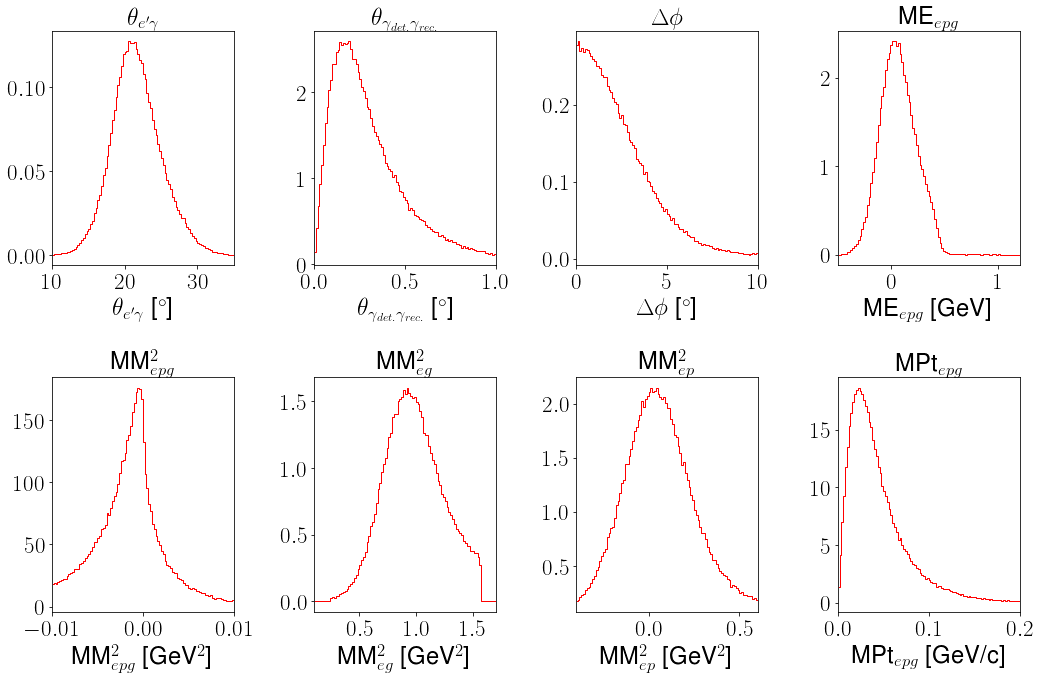

<Figure size 432x288 with 0 Axes>

In [42]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [43]:
len(dvcsSimInbCDFT)

207098

In [44]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[0.02294631 0.15807793 0.0069995  1.16446434 0.44452549] -0.23706874543274783 0.34759867883976714 5.704103763271018e-05
[0.02330899 0.15469681 0.00823474 1.11508891 1.26585343] -0.2311446159233003 0.34101738786881636 0.0009884073176191777
[0.02283868 0.15391603 0.01724586 1.15224625 1.31028462] -0.2303306626331207 0.338943560489314 0.00826573554919785
[0.02281036 0.15376692 0.0203383  1.1554566  1.31573503] -0.230113721413847 0.33860900351167833 0.01916644520984745
[0.02276252 0.15379274 0.02153444 1.15999033 1.2932732 ] -0.230204037341322 0.3386141985016352 0.02579112326827737


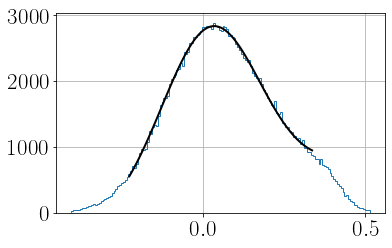

In [45]:
dvcsSimInbCDFT.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [46]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.4386157175350296 0.484140750719538


In [47]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.ME_epg<0.484)&(dvcsSimInbCDFT.ME_epg>-0.439)]

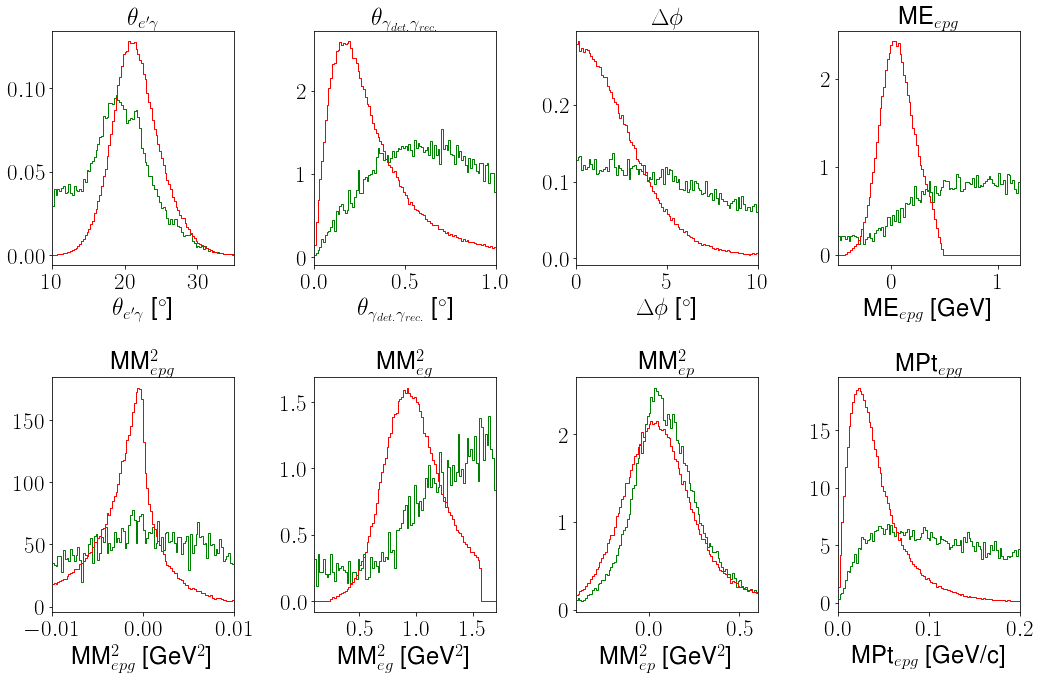

<Figure size 432x288 with 0 Axes>

In [48]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [49]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.coneAngle, bins = np.linspace(10, 30, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [20, 5, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 2.08967175e+01  2.96426585e+00 -5.86884533e-02  3.25789050e-03
 -1.74475602e-05] 16.02093405041662 27.79263102962713 9.992007221626409e-16
[ 2.09088385e+01  2.92421581e+00 -2.36716572e-02 -3.00320541e-06
  5.80802613e-05] 16.09893147602713 27.711581694606068 5.681011217006926e-13
[ 2.09053056e+01  2.91548495e+00 -2.30934998e-02 -7.69674196e-05
  6.08733190e-05] 16.1097596091078 27.687737805626664 6.423750420481156e-13


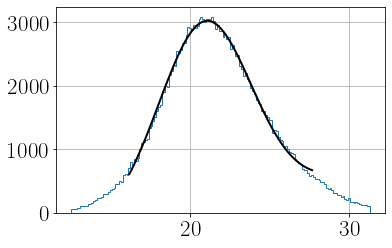

In [50]:
dvcsSimInbCDFT.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [51]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

12.158850757888109 29.651760438183786


In [52]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle<29.652)&(dvcsSimInbCDFT.coneAngle>12.159)]

In [53]:
len(dvcsSimInbCDFT)

202324

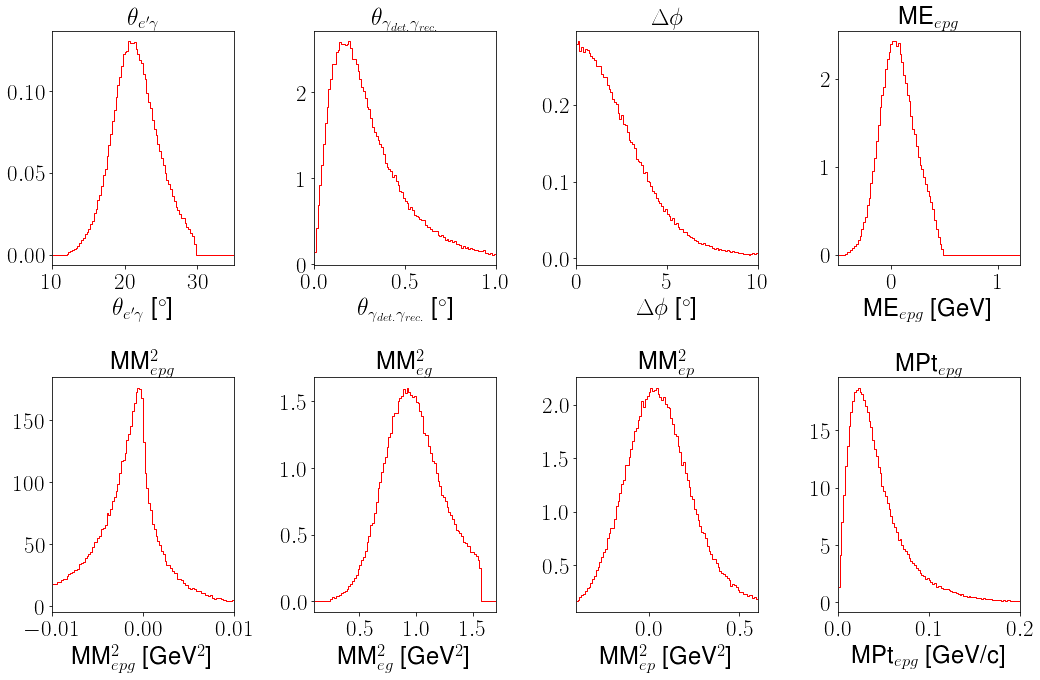

<Figure size 432x288 with 0 Axes>

In [54]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [55]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.001 0.10743318390075506
6.610549821939316e-05 0.001 0.0985752418378992
[ 3.26112175e+00  5.86355209e-03  3.09038966e-02 -5.85960418e+00
  2.14253564e+02 -1.37189647e+03] 0.001 0.0985752418378992 6.610549821939316e-05
0.02420248039786821 0.001 0.0954600819031695
[ 3.02413509e+00  5.60022402e-03  2.99532860e-02 -6.66085318e+00
  2.63995056e+02 -1.81340487e+03] 0.001 0.0954600819031695 0.02420248039786821
4.406598238582138e-05 0.001 0.09441532198808111
0.0011300516003110994 0.001 0.09435175734516461
0.00041920553771357394 0.001 0.09437046180520066
0.0009505383038641568 0.001 0.09435310646778002
0.000494241254293315 0.001 0.09437739321154792
0.0010174034220045147 0.001 0.09433454813897411
0.00033301100806237827 0.001 0.094379279706988


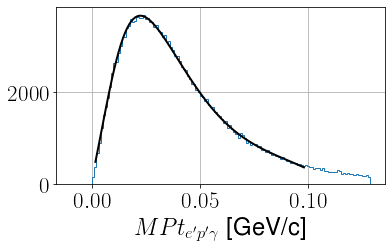

In [57]:
dvcsSimInbCDFT.MPt.hist(bins = extendedBins(bins_opt, 10, 30), histtype = 'step')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.xlabel(r"$MPt_{e'p'\gamma}$" + " ["+GeVc+"]")

plt.show()

In [159]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.09580315960683035

In [160]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MPt<0.0958)]

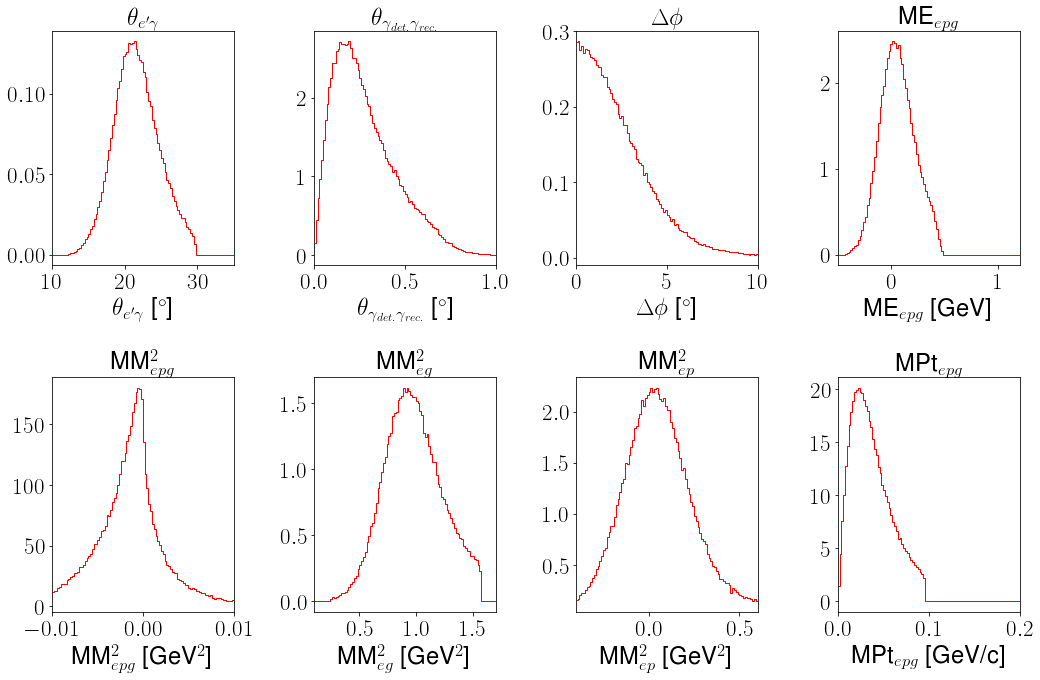

<Figure size 432x288 with 0 Axes>

In [161]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [162]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.85, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = skewnorm.ppf(0.998, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.005 0.7368413921536954 0.0
0.005 0.6841434901922067 0.2430889274046365
[ 2.76972809  0.03510528  0.21002894 -1.13183845  6.45886738 -6.46409561] 0.005 0.6841434901922067 0.2430889274046365
0.005 0.6753178706288917 0.051378779479961945
0.005 0.6753671211522748 0.3662712381308181
[ 2.69922617  0.03513116  0.20718053 -1.15465872  6.80981565 -6.94286103] 0.005 0.6753671211522748 0.3662712381308181
0.005 0.6753734339089076 0.4178269388314306
[ 2.6992149   0.03512965  0.20718306 -1.15466664  6.80991111 -6.94314018] 0.005 0.6753734339089076 0.4178269388314306
0.005 0.675405754925604 0.38691116597663
0.005 0.6753424644395165 0.3202277952662229
0.005 0.6754134609093789 0.4150024306522251
0.005 0.6753940224048786 0.32148599415959256
0.005 0.6753568439308989 0.3608605804879136


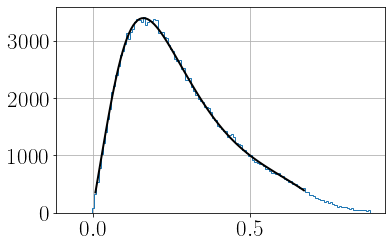

In [163]:
dvcsSimInbCDFT.loc[:, "reconGam"].hist(bins = extendedBins(bins_opt, 10, 30), histtype = 'step')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [164]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.6590518534171655

In [165]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.reconGam<0.659]

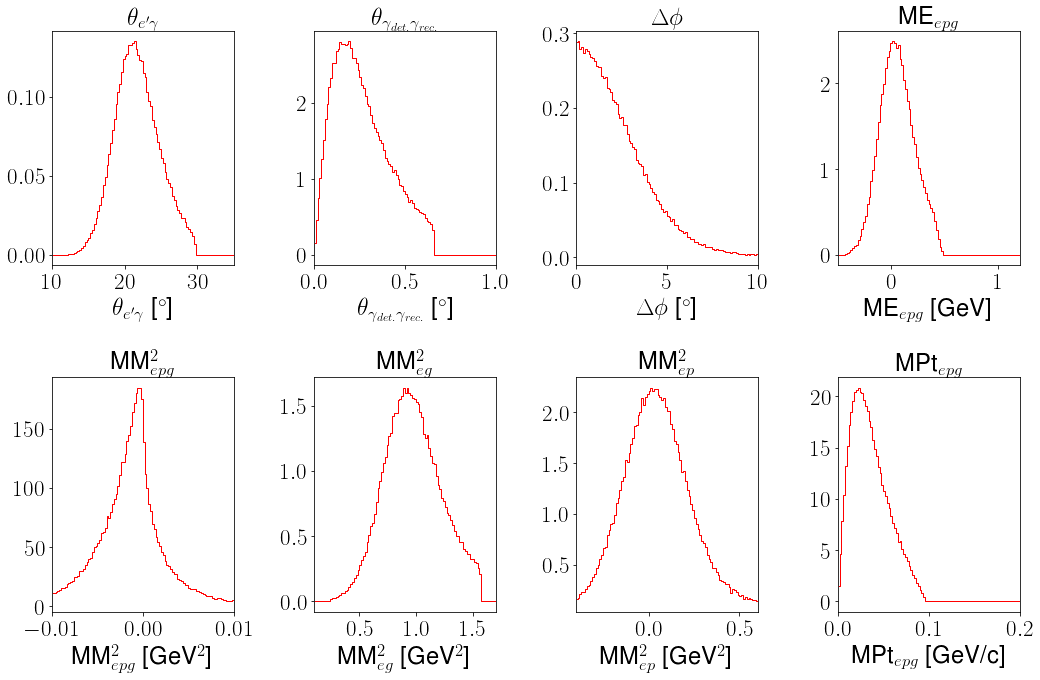

<Figure size 432x288 with 0 Axes>

In [166]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [167]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.786654839271331 6.95334758039623e-05
[ 2.71466194e+00 -1.43627349e-02  5.10184261e-03 -3.33713632e-04] 0 6.786654839271331 6.95334758039623e-05
0 7.030534521520155 0.46159285726709454
[ 2.81221381e+00  9.52907360e-03 -5.07356558e-03  6.52424525e-04] 0 7.030534521520155 0.46159285726709454
0 7.052843485037116 0.17759119379836164
0 7.048071805112112 0.1368963598082078
0 7.047349489308923 0.06914778982733738
0 7.047336714556039 0.07912409691024058
0 7.047260302168793 0.08072770302174348
0 7.047030933537997 0.08570840814429548
0 7.046525334450358 0.08614422334137484
0 7.046802119187796 0.08432926753666836


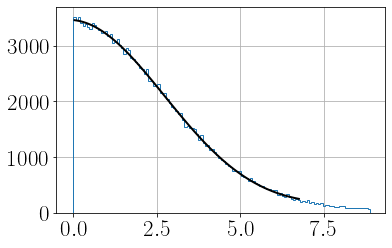

In [168]:
dvcsSimInbCDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [169]:
3*scale

8.456162543025355

In [170]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.coplanarity<8.456]

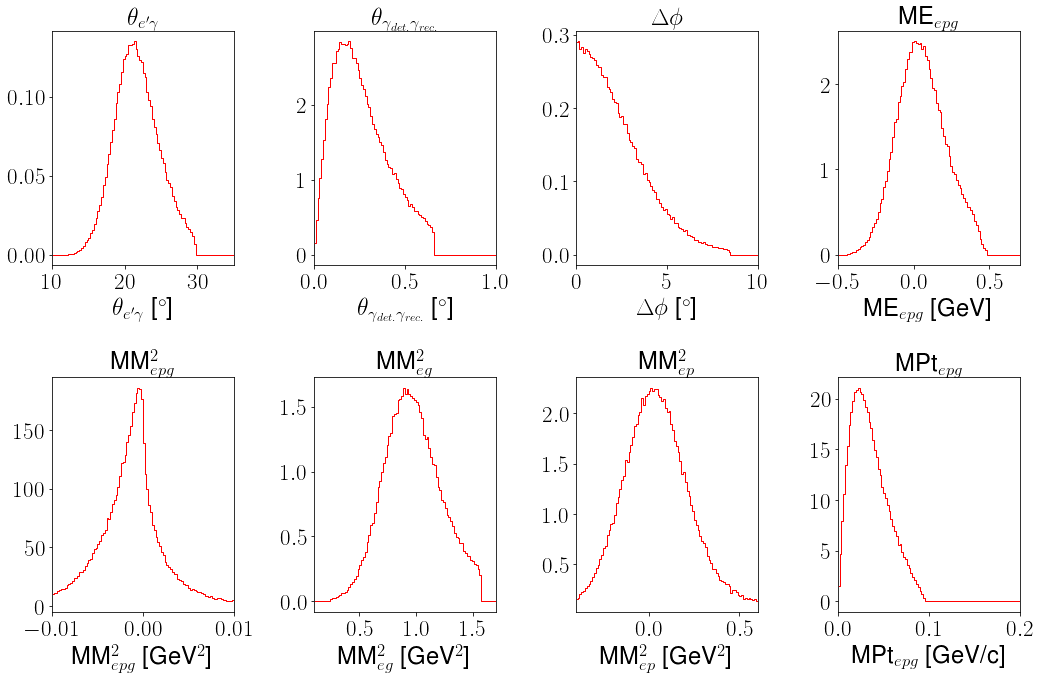

<Figure size 432x288 with 0 Axes>

In [171]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [172]:
dvcsSimInbCDFT.MM2_epg.mean()+3*dvcsSimInbCDFT.MM2_epg.std()

0.012185364573722775

In [173]:
dvcsSimInbCDFT.MM2_epg.mean()-3*dvcsSimInbCDFT.MM2_epg.std()

-0.015119658317837029

In [174]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_epg<0.0122)&(dvcsSimInbCDFT.MM2_epg>-0.0151)]

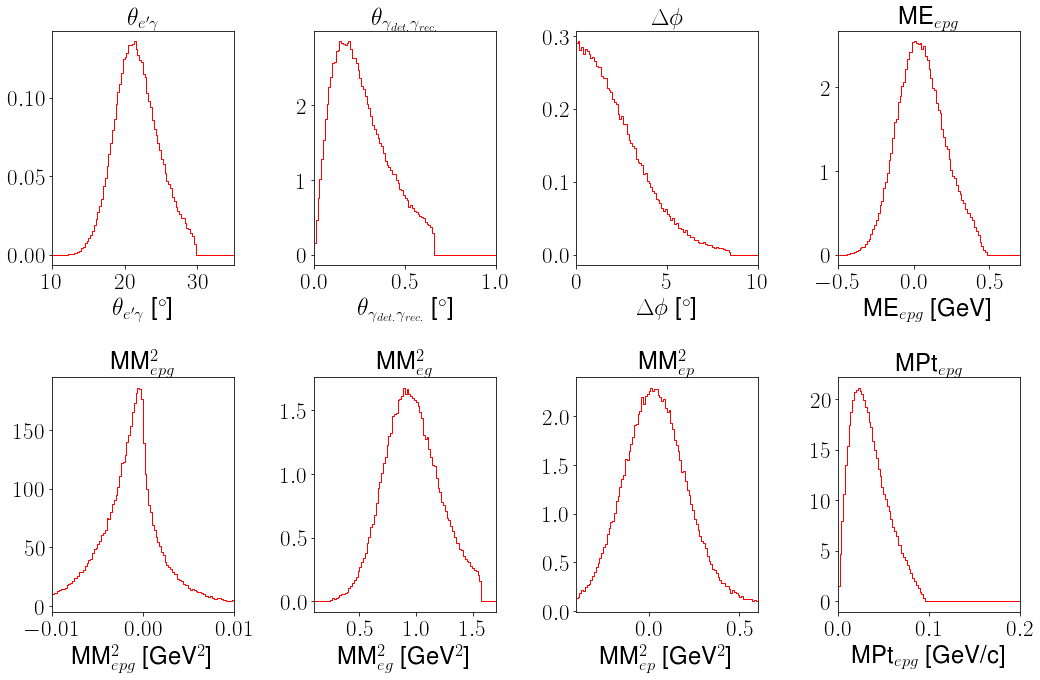

<Figure size 432x288 with 0 Axes>

In [175]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [176]:
len(dvcsSimInbCDFT)

174128

## CDFD cuts

In [177]:
dvcsSimInbCD = dvcsSimInb.loc[dvcsSimInb.config == 2]

In [178]:
len(dvcsSimInbCD)

324193

In [181]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_ep, bins = np.linspace(-0.6, 0.6, 101))
        params = [0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.03, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        dist_opt = dist
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.00607673  0.14418663 -0.07472141  0.59792467  4.51255022] -0.2651085650628373 0.3021998577336637 6.889804904375296e-08
[ 0.00560878  0.14204958 -0.06918804  0.62856874  5.15053064] -0.2615571696730071 0.29734296109906194 1.778781869110624e-05
[ 5.31744174e-03  1.41216131e-01 -6.68672532e-02  6.50002540e-01
  5.40338504e+00] -0.26028095445903215 0.2953399165485499 0.0004841756335013381
[ 5.19676968e-03  1.41033650e-01 -6.35108014e-02  6.60852481e-01
  5.43167373e+00] -0.26005841725074363 0.2948444741585089 0.0012925702505857117
[ 5.21073785e-03  1.40972911e-01 -6.27117518e-02  6.59909267e-01
  5.44413792e+00] -0.2599302128200518 0.2947337010436493 0.001718099226102221
[ 5.20817469e-03  1.40974885e-01 -6.24126415e-02  6.60261675e-01
  5.43788818e+00] -0.25993648862950286 0.2947351919563195 0.0019180583091065184
[ 5.21710641e-03  1.40969347e-01 -6.25413401e-02  6.59485968e-01
  5.44229595e+00] -0.2599171401673311 0.294732749009447 0.0020538071363628285


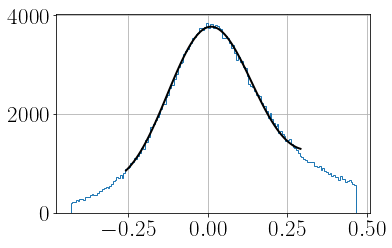

In [184]:
dvcsSimInbCD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [185]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.4176909342593693 0.42812514706994476


In [186]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_ep<0.428)&(dvcsSimInbCD.MM2_ep>-0.418)]

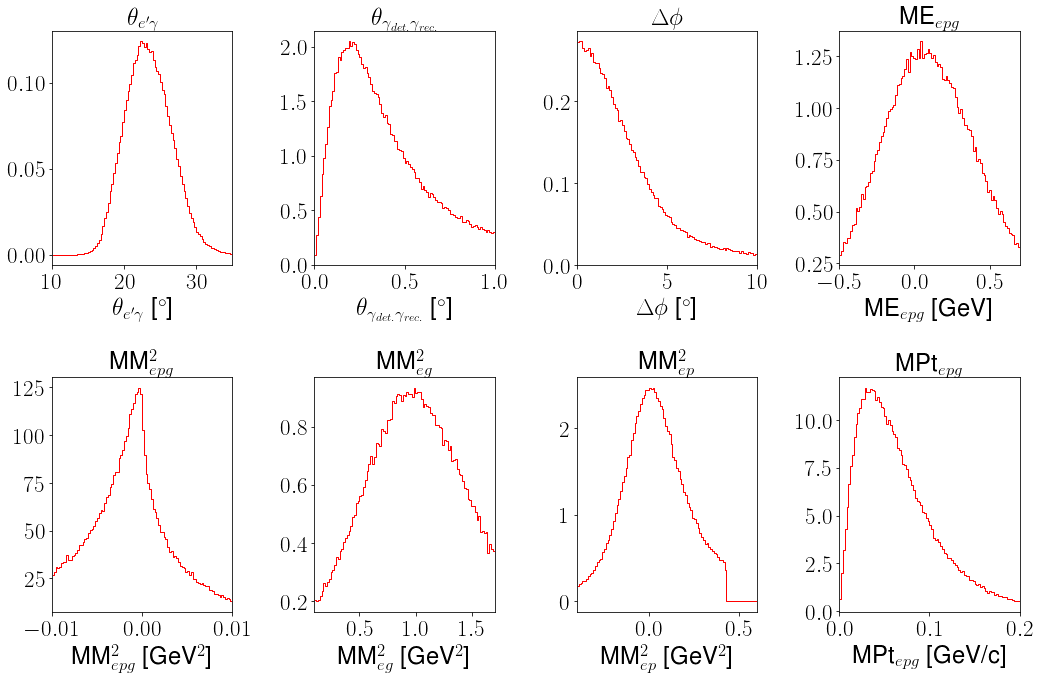

<Figure size 432x288 with 0 Axes>

In [187]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [188]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        params = [0.908, 0.5, -0.471, 0.526, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.94950562  0.46888866  0.01115544 -0.10721095  0.09427283] -0.14129251109643315 1.720758821782563 0.0002546743559734832
[ 0.94608657  0.46015398  0.02362691 -0.10926421  0.1011407 ] -0.12439165689930387 1.7029725030062504 0.008545991137136055
[ 0.94633926  0.45854333  0.02708215 -0.10817634  0.10064833] -0.1203920416214076 1.7005759258919206 0.04248355271399562
[ 0.94639443  0.45820054  0.02780299 -0.10842393  0.1007313 ] -0.11953941280095193 1.7000672513094364 0.05595864777539894


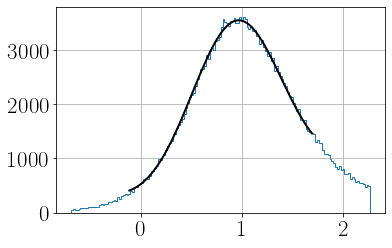

In [189]:
dvcsSimInbCD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [190]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.4282071793147191 2.320996048457596


In [191]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_eg<2.321)&(dvcsSimInbCD.MM2_eg>-0.428)]

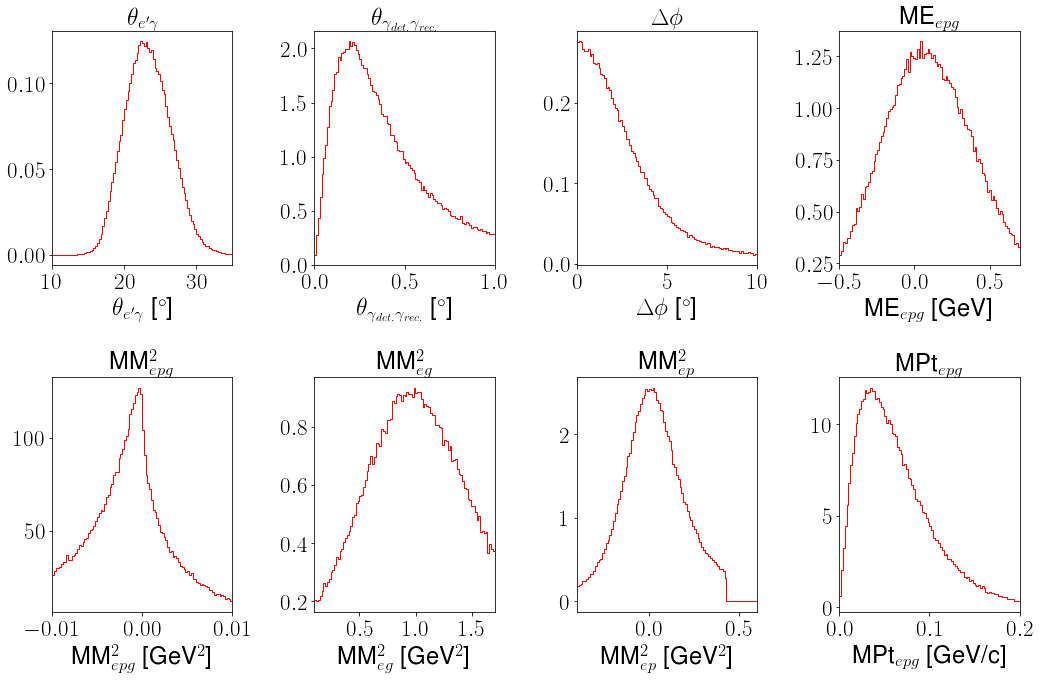

<Figure size 432x288 with 0 Axes>

In [192]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [195]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.ME_epg, bins = np.linspace(-0.8, 0.8, 101))
    else:
        dist, bins = np.histogram(dvcsSimInbCD.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.06280083  0.3332135  -0.02349517  0.07579236  0.16366676] -0.7123696823383641 0.7471376867630284 3.894316980002088e-09
[ 0.06159654  0.32847669 -0.01634389  0.08124646  0.19057414] -0.702554516336385 0.7362051941875187 0.001946956321126514
[ 0.06149562  0.32782918 -0.01373769  0.08226561  0.19083748] -0.7011490918483672 0.7347744327434205 0.060439077241952965


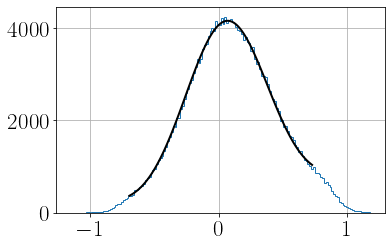

In [196]:
dvcsSimInbCD.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [197]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.9219919139615587 1.0449831487126762


In [198]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.ME_epg<1.045)&(dvcsSimInbCD.ME_epg>-0.922)]

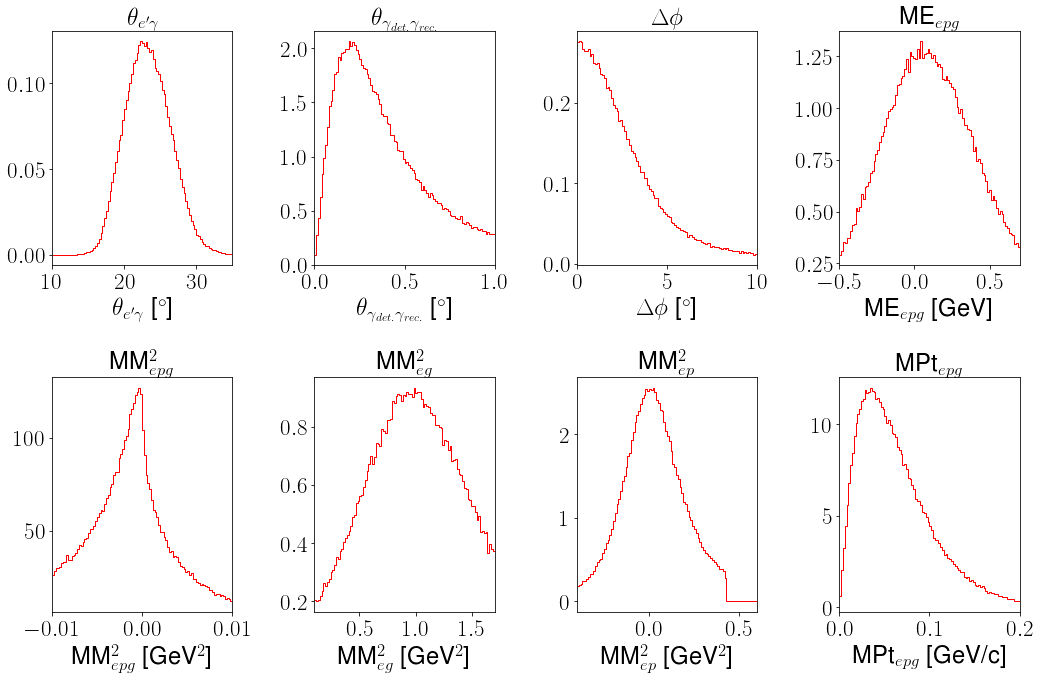

<Figure size 432x288 with 0 Axes>

In [199]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [200]:
len(dvcsSimInbCD)

251290

In [201]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.coneAngle, bins = np.linspace(15, 35, 101))
        params = [20, 5, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.04, loc = loc, scale = scale)
    ub = norm.ppf(0.96, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 2.28040379e+01  3.33780818e+00 -2.40591213e-01  2.03193875e-02
 -4.05868167e-04] 16.96058362693861 28.64749219310736 0.184715128856191


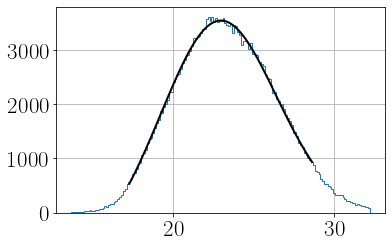

In [202]:
dvcsSimInbCD.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [203]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

12.79061338056716 32.81746243947882


In [204]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.coneAngle<32.817)&(dvcsSimInbCD.coneAngle>12.791)]

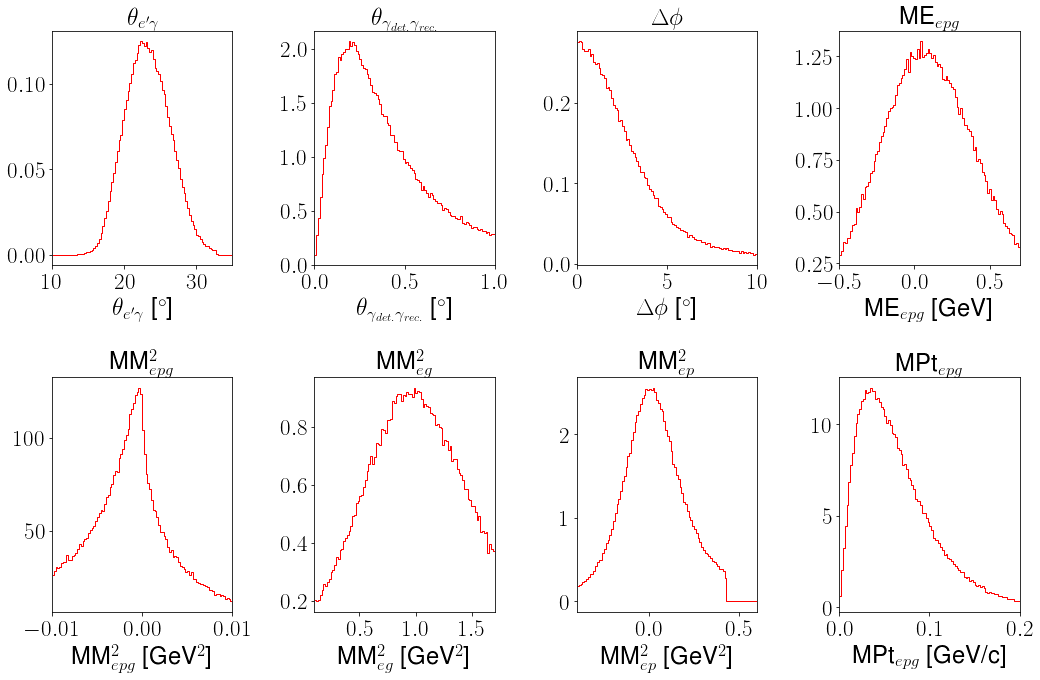

<Figure size 432x288 with 0 Axes>

In [205]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [206]:
len(dvcsSimInbCD)

250694

In [209]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.MPt, bins = np.linspace(0.004, 0.2, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.1*loc
    ub = loc + 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0015181277626368228 0.0009532531242649535 0.1528720706426927
[ 4.90853684e+00  9.53253124e-03  5.73358158e-02 -1.39592687e+00
  3.01189554e+01 -1.10647446e+02] 0.0009532531242649535 0.1528720706426927 0.0015181277626368228
1.0675352823952267e-09 0.0007805991290236868 0.140287042423301
1.4519044128080694e-06 0.0006983651218154815 0.13535087902609075
4.2328761513665825e-06 0.000666065220411498 0.13340047124460924
3.8105579247549315e-07 0.000645327945723206 0.13227801533851202
6.145119190092974e-05 0.0006336487513909204 0.13167029088123297
2.161683331058928e-05 0.0006272798670195337 0.13130118836309404
2.2693120484973406e-05 0.0006261844777479539 0.13122029043350766
0.00020783642041377615 0.0006241052600197868 0.13110128854309352
0.00018327429047515498 0.0006217766594292407 0.13103887576917497


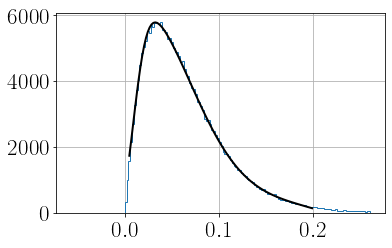

In [210]:
dvcsSimInbCD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [211]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.18219668910980302

In [212]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MPt<0.182)]

In [213]:
len(dvcsSimInbCD)

244801

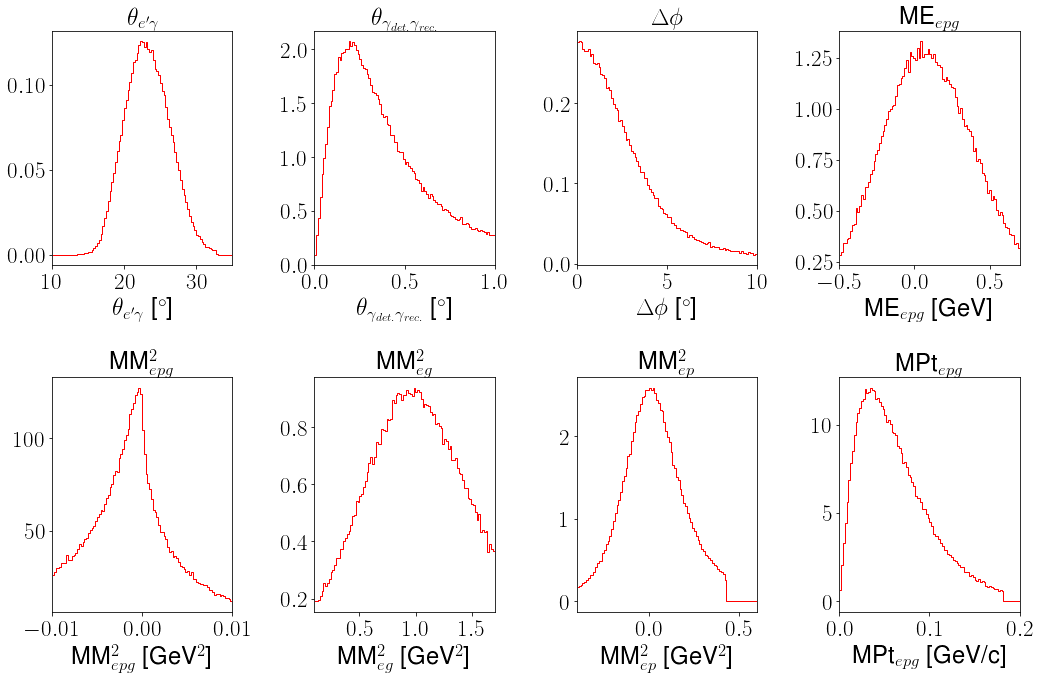

<Figure size 432x288 with 0 Axes>

In [214]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [215]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.reconGam, bins = np.linspace(0.01, 1.2, 101))
        params = [10, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = skewnorm.ppf(0.998, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(i, lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 0.001 0.9834573122543998 2.220446049250313e-16
[ 4.14802548  0.03940021  0.30549713 -0.71616945  2.32364371 -1.3500538 ] 0.001 0.9834573122543998 2.220446049250313e-16
1 0.001 0.9205339484276063 0.0006914550887602289
[ 3.64839065  0.03667967  0.28601548 -0.84806842  3.23951511 -2.17051616] 0.001 0.9205339484276063 0.0006914550887602289
2 0.001 0.8977538344242407 0.3872992358608631
[ 3.48542038  0.03535562  0.27907229 -0.90398575  3.67055049 -2.59325682] 0.001 0.8977538344242407 0.3872992358608631
3 0.001 0.8911371336187296 0.017890675575751747
4 0.001 0.8866166222266139 0.20722419063374653
5 0.001 0.8854684422001982 0.08668464173617851
6 0.001 0.8847569363098504 0.15357591465429699
7 0.001 0.8837835858763271 0.16879383266620995
8 0.001 0.8835391217993748 0.20881207551273784
9 0.001 0.8836037726597277 0.15357343534105627


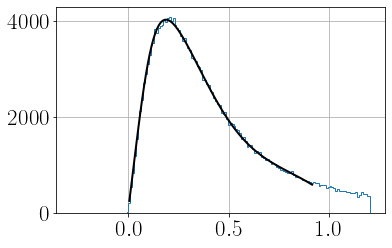

In [216]:
dvcsSimInbCD.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [217]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.8757689245714124

In [218]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.reconGam<0.876)]

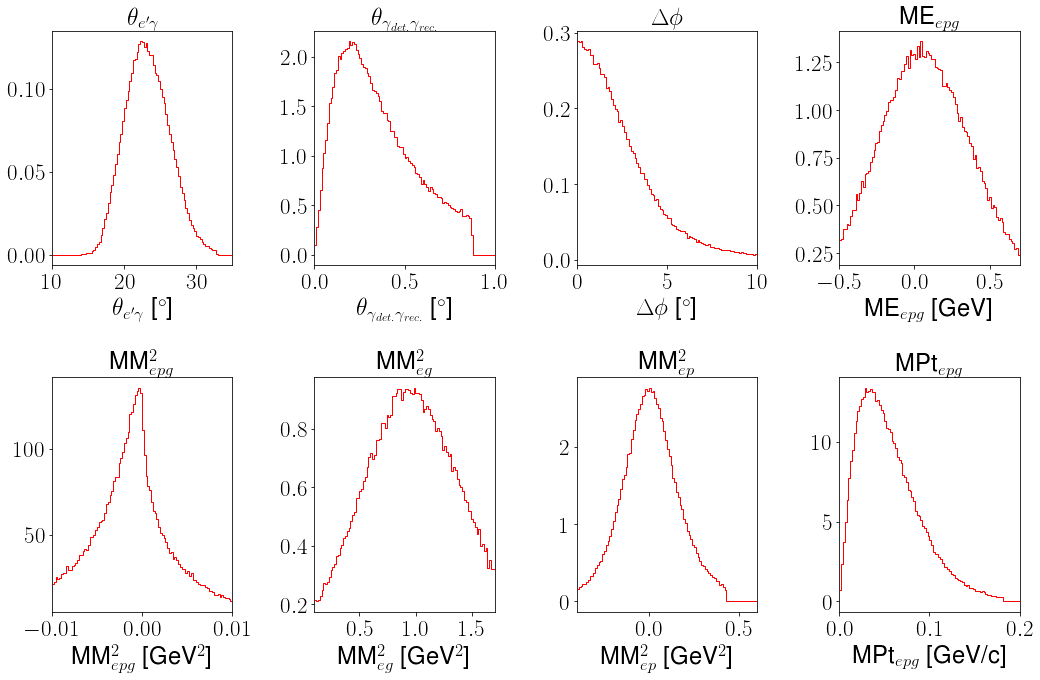

<Figure size 432x288 with 0 Axes>

In [219]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [225]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimInbCD.coplanarity, bins = np.linspace(0, 7, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimInbCD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.2*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.325037173333143 3.988120567333109e-05
[ 2.87501690e+00  2.39501602e-02 -1.56890517e-02  2.02596462e-03] 0 6.325037173333143 3.988120567333109e-05
0 6.185243208196227 0.18684622778389837
[ 2.81147419e+00  2.28700667e-02 -1.42495591e-02  1.95441305e-03] 0 6.185243208196227 0.18684622778389837
0 6.151011170012007 0.05529363644614638
0 6.134820125556319 0.004264427691737738
0 6.127639353669188 0.13423092758383903
0 6.12750413115453 0.3614338008118141
[ 2.78522915e+00  2.18384914e-02 -1.34701074e-02  1.91506718e-03] 0 6.12750413115453 0.3614338008118141
0 6.127054574258509 0.3677966857603028
[ 2.78502481e+00  2.18151443e-02 -1.34595970e-02  1.91427505e-03] 0 6.127054574258509 0.3677966857603028
0 6.125969016583822 0.42069474536553886
[ 2.78453137e+00  2.17567357e-02 -1.34360295e-02  1.91302742e-03] 0 6.125969016583822 0.42069474536553886
0 6.124522376259678 0.45812785180114535
[ 2.78387381e+00  2.16801280e-02 -1.34006185e-02  1.91052000e-03] 0 6.124522376259678 0.45812785180114535
0 6.1

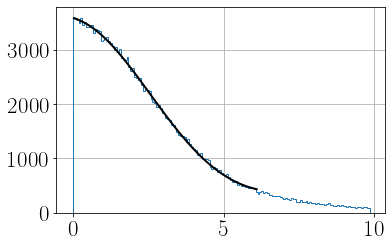

In [226]:
dvcsSimInbCD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 60), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [227]:
print(3*params_opt[0])

8.352388171486911


In [228]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.coplanarity<8.352)]

In [229]:
print(dvcsSimInbCD.MM2_epg.mean()-3*dvcsSimInbCD.MM2_epg.std(), dvcsSimInbCD.MM2_epg.mean()+3*dvcsSimInbCD.MM2_epg.std())

-0.027500535735359554 0.024095192535263158


In [230]:
dvcsSimInbCD = dvcsSimInbCD.loc[(dvcsSimInbCD.MM2_epg<0.0241)&(dvcsSimInbCD.MM2_epg>-0.0275)]

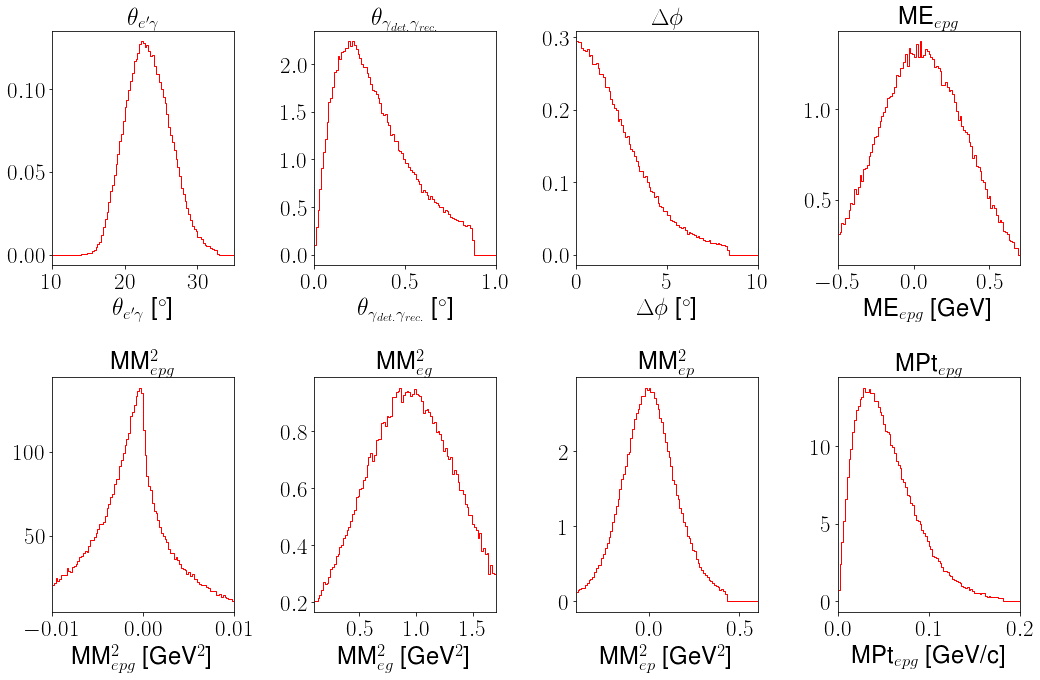

<Figure size 432x288 with 0 Axes>

In [231]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [232]:
len(dvcsSimInbCD)

195352

## FDFD cuts

In [499]:
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]

In [500]:
contInbFD = 0.3

In [501]:
len(dvcsSimInbFD)

82991

In [502]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 456.01773860004704 95
3.173578024817658e-07 180.13795741121046 95
[ 4.37482629e-03  1.41894121e-01 -1.86196997e-01  1.18702475e-01
  6.66998583e+00] -0.28704007064398734 0.29578972321469477 3.173578024817658e-07
0.0002278770891184223 150.97000978905305 95
[ 4.54446304e-03  1.37607548e-01 -1.64342951e-01  9.90587328e-02
  7.85780286e+00] -0.278066888196123 0.28715581428346376 0.0002278770891184223
0.17727436019103293 107.62057922679428 95
[ 4.94714554e-03  1.35439529e-01 -1.69174164e-01  6.21436186e-02
  8.79065208e+00] -0.27321164014667376 0.28310593122293487 0.17727436019103293
0.13616679685643007 110.21631866607902 95
0.1902389531104085 106.89131911290418 95
[ 4.85750804e-03  1.34102023e-01 -1.66101243e-01  6.72641061e-02
  9.31642254e+00] -0.2705543749358161 0.28026939102411874 0.1902389531104085
0.3775793236207372 98.6800747727664 95
[ 4.75374128e-03  1.33861947e-01 -1.67388388e-01  7.43285649e-02
  9.44381869e+00] -0.27016508650056986 0.2796725690652986 0.3775793236207372
0.43

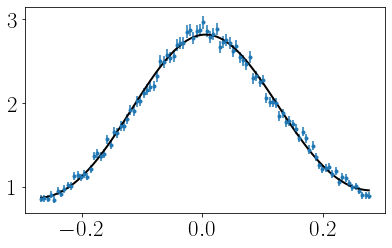

In [503]:
# dvcsSimInbFD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [504]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.3964728214095593 0.4059754895265969


In [505]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_ep<0.406)&(dvcsSimInbFD.MM2_ep>-0.396)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_ep<0.406)&(bkgSimInbFD.MM2_ep>-0.396)]

In [506]:
len(dvcsSimInbFD)

63656

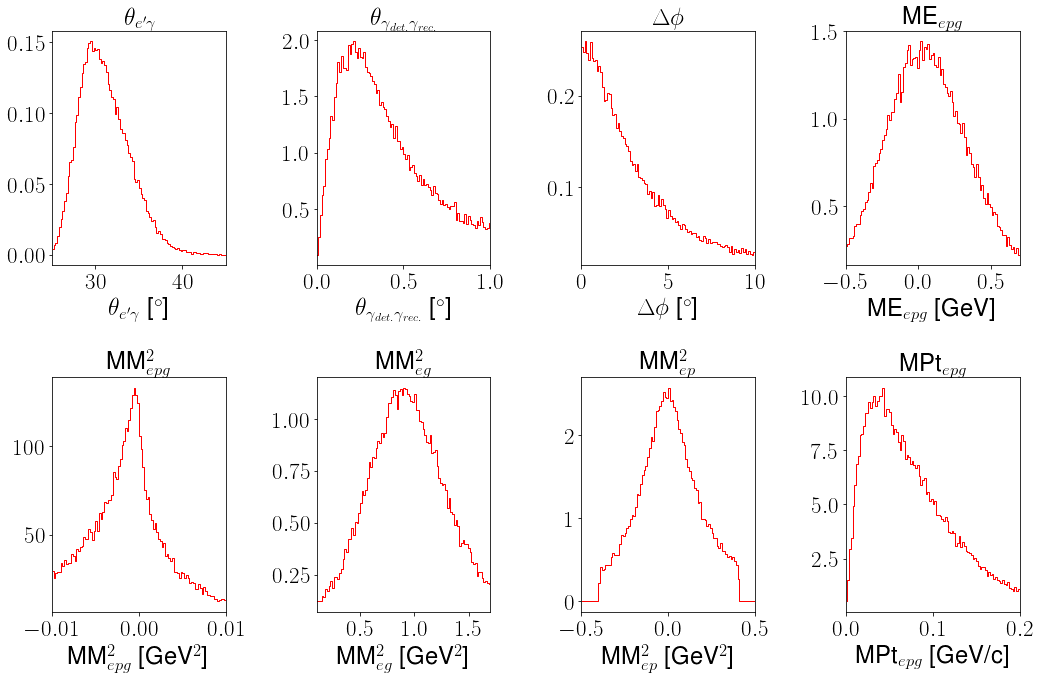

<Figure size 432x288 with 0 Axes>

In [507]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [508]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 2606.136570636772 95
7.405157598228129e-10 203.29014876695084 95
[ 0.94716009  0.38473247  0.00128399 -0.24661795  0.20673088] 0.15701620117286552 1.7373039856894383 7.405157598228129e-10
0.01021316614326706 129.8383888179765 95
[ 0.94086127  0.37223079  0.0264382  -0.31259983  0.2633236 ] 0.17639269753970122 1.7053298372995318 0.01021316614326706
0.09121724164246647 113.84025164845907 95
[ 0.93944602  0.36838444  0.03991514 -0.34558465  0.28708897] 0.18287687870508063 1.6960151638562218 0.09121724164246647
0.007031535841280245 132.17653079712008 95
0.05399326899895729 118.15255107380636 95
0.048674473198452195 118.9593500482018 95
0.05123511484238841 118.5621664533111 95
0.055575276937055995 117.9254360849088 95
0.04313673957867481 119.88248693371851 95


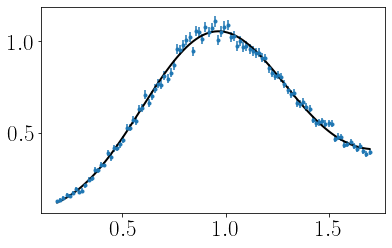

In [509]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [510]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.1657072990580315 2.044599341619334


In [511]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_eg<2.045)&(dvcsSimInbFD.MM2_eg>-0.166)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_eg<2.045)&(bkgSimInbFD.MM2_eg>-0.166)]

In [512]:
len(dvcsSimInbFD)

60746

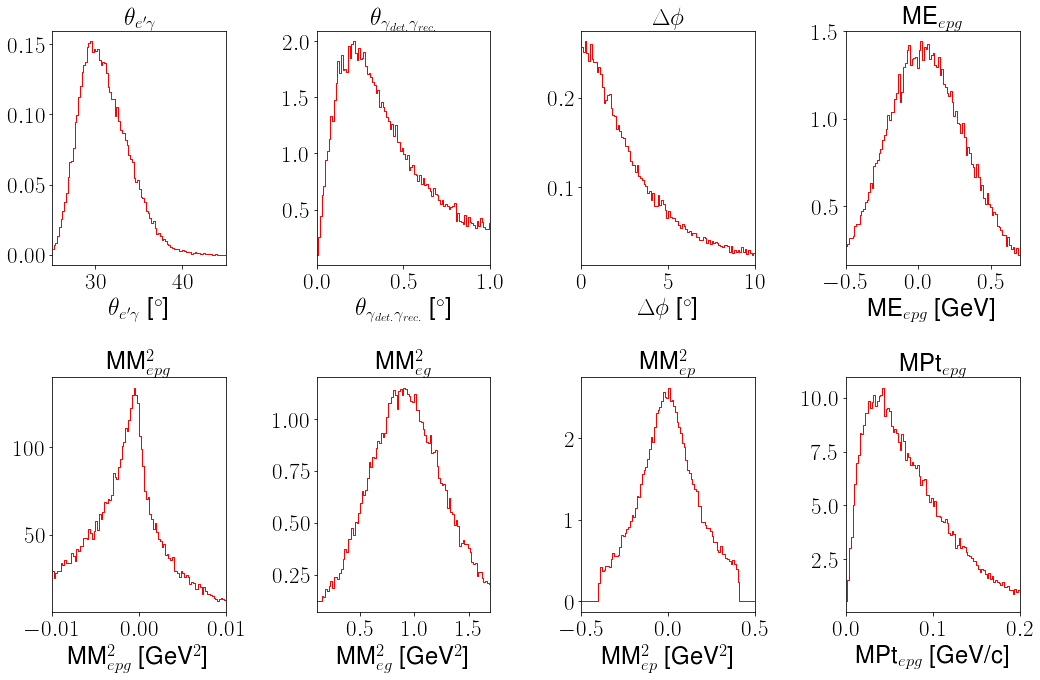

<Figure size 432x288 with 0 Axes>

In [513]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [514]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(-1, 1, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.ME_epg, bins = np.linspace(-1, 1, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 1641.5676420010818 95
1.1242512774067848e-06 174.9489278329195 95
[ 0.06998254  0.31646647 -0.05444868  0.19450551  0.33578387] -0.5799601158106579 0.7199252047192078 1.1242512774067848e-06
0.12600221823464897 110.94520631232814 95
[ 0.06597605  0.30996207 -0.04739597  0.22933327  0.40529634] -0.570608219990909 0.7025603105826044 0.12600221823464897
0.06176255345752957 117.08580830989152 95
0.017246979320417855 126.40952871931708 95
0.0432956863362689 119.85462758295554 95
0.08771809102221872 114.17707125021536 95
0.09639726704330265 113.35992286681723 95
0.07819850641482928 115.15099972261093 95
0.0944562570760239 113.53746758134162 95


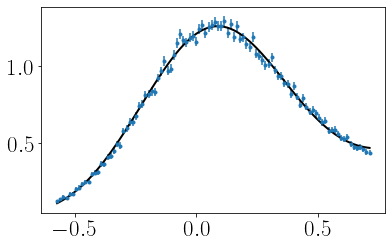

In [515]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [516]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.8639101671685312 0.9958622577602267


In [517]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.ME_epg<0.996)&(dvcsSimInbFD.ME_epg>-0.864)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.ME_epg<0.996)&(bkgSimInbFD.ME_epg>-0.864)]

In [518]:
len(dvcsSimInbFD)

60544

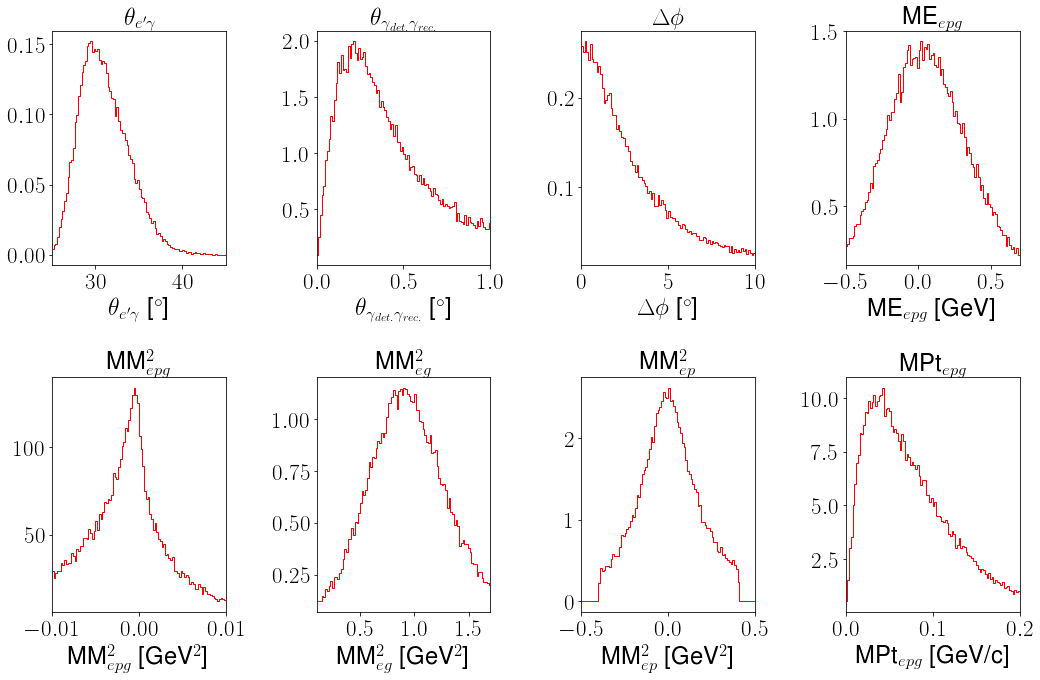

<Figure size 432x288 with 0 Axes>

In [519]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [520]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coneAngle, bins = np.linspace(25, 38, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coneAngle, bins = np.linspace(25, 38, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coneAngle, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coneAngle, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [31, 5, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 1922.6287029245711 95
0.0 1501.2510267107264 95
1.3107009921853319e-09 201.20660791089713 95
[ 2.95572600e+01  2.18178118e+00  1.17896105e+00 -9.22503884e-02
  1.76994522e-03] 25.076429294985566 33.145970717488105 1.3107009921853319e-09
1.8426330351650755e-05 162.8498246103391 95
[ 2.95208444e+01  2.13360678e+00  1.26583947e+00 -9.92415250e-02
  1.91237330e-03] 25.13895178864109 33.0303152384584 1.8426330351650755e-05
7.180491997216265e-05 156.56895696755058 95
[ 2.95019570e+01  2.11510360e+00  1.34741230e+00 -1.05350889e-01
  2.02700562e-03] 25.1580652901997 32.98099284478086 7.180491997216265e-05
9.992308219575197e-05 154.99429692243427 95
[ 2.94845836e+01  2.10322087e+00  1.44523840e+00 -1.12511357e-01
  2.15743046e-03] 25.165096000638393 32.94407403572167 9.992308219575197e-05
1.9860448042030576e-05 162.51143657733041 95
2.7865928209025448e-05 160.97170334639333 95
4.9944085868558474e-05 158.27580113596437 95
6.946356538450882e-05 156.72579752873168 95


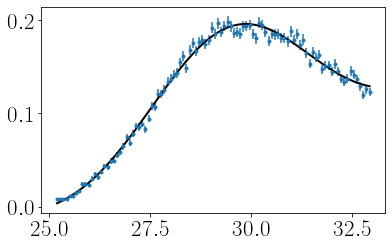

In [521]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [522]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

23.174920964237124 35.794246165099835


In [523]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coneAngle>23.175)&(dvcsSimInbFD.coneAngle<35.794)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coneAngle>23.175)&(bkgSimInbFD.coneAngle<35.795)]

In [524]:
len(dvcsSimInbFD)

56941

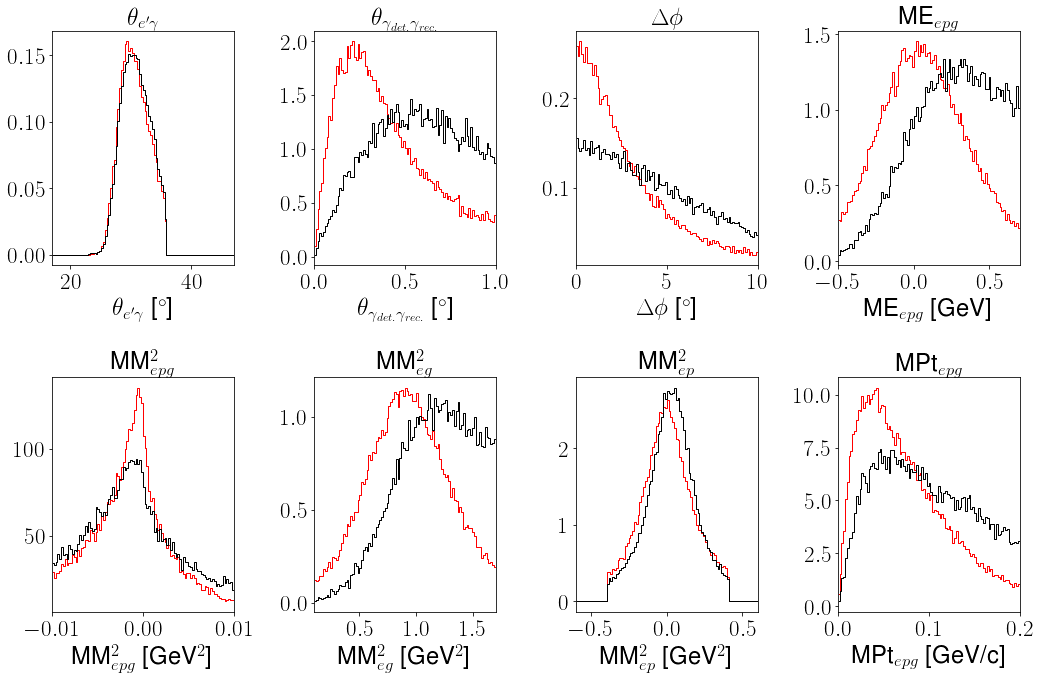

<Figure size 432x288 with 0 Axes>

In [525]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [17, 0, 0, -0.5, -0.01, 0.1,-0.6 , 0]
binends = [47, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvpi0p, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvpi0p, where='mid',color='k', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [526]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(0.05, 0.3, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MPt, bins = np.linspace(0.05, 0.3, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_skewnormfit, [1, 0, 0.03, 0, 0, 0], args=(bincenters, simDist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = loc*0.3
    ub = loc + 2.5*scale
    pvalue, chi2fit, dof = probFit(simDist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = ub
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.032168021464642704 120.92264314693912 94
[ 9.54239241e+00 -8.14279335e-03  8.35442011e-02  5.89047077e+00
 -2.95366940e+01  3.72168279e+01] -0.002442838006441589 0.2007177093446398 0.032168021464642704
0.0 inf 94


<ipython-input-101-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.6498609980768368 88.17620551249773 94
[ 4.30662524e+00  2.22372278e-03  6.04766741e-02 -5.79694733e+00
  1.24874804e+02 -4.62785637e+02] 0.0006671168337085547 0.15341540807387077 0.6498609980768368
0.10297816605116528 111.68580334135025 94
0.04887833624540594 117.80633435869115 94
0.11679088344907762 110.55807328232575 94
0.3376409464711452 99.17171264629965 94
0.4264491144379333 95.88898465480167 94
0.5060334047723557 93.127820837963 94
0.45887598969590027 94.75133972858852 94


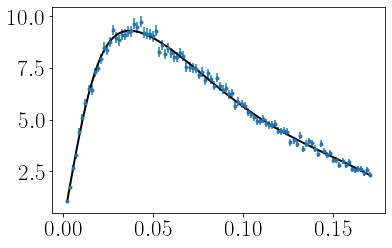

In [527]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.errorbar(bincenters, simDist, yerr = uncDist, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
# plt.plot(bincenters, skewnormfit(params, bincenters), 'k-', lw=2, label='frozen pdf')
plt.show()

In [529]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.18434643035305576

In [530]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MPt<0.184)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MPt<0.184)]

In [531]:
len(dvcsSimInbFD)

52796

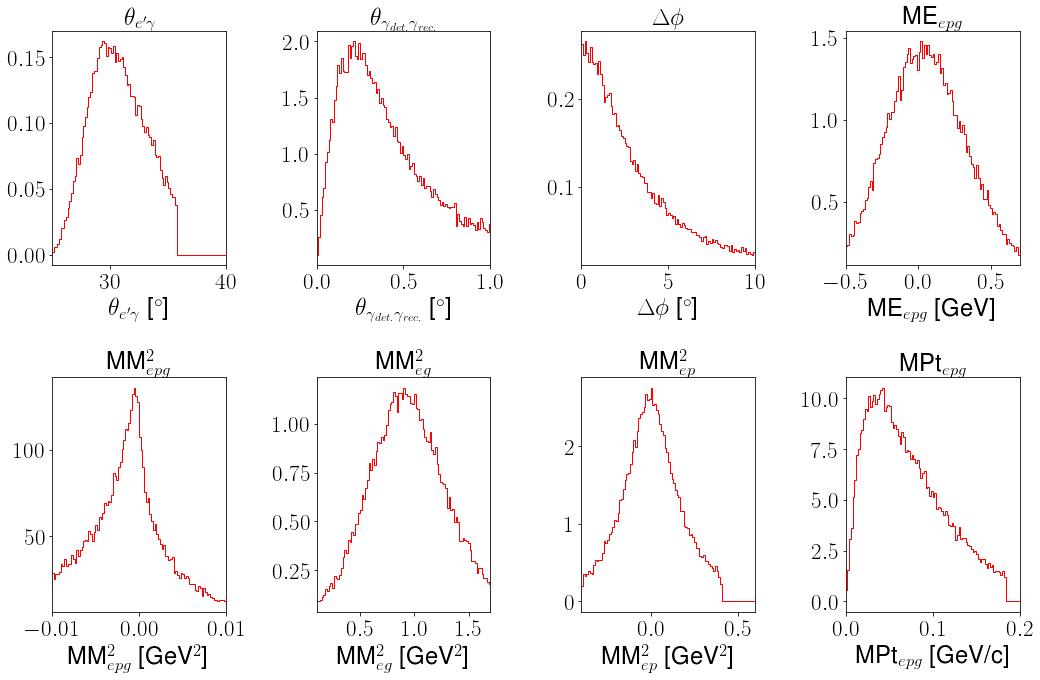

<Figure size 432x288 with 0 Axes>

In [532]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [533]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(0.05, 2, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.reconGam, bins = np.linspace(0.05, 2, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = loc*0.3
    ub = loc + 3.5*scale
    pvalue, chi2fit, dof = probFit(simDist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = ub
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 449.13710400995586 94
1.569099905562865e-08 190.53389447118175 94
[ 4.66038506  0.03007145  0.40805433 -0.66676034  1.61785483 -0.70294684] 0.009021433575919575 1.4582615958009495 1.569099905562865e-08
9.170945604286551e-05 154.13372076395365 94
[ 4.34411922  0.02779528  0.39361201 -0.72602581  1.90280028 -0.88632243] 0.00833858332158888 1.4054373055498588 9.170945604286551e-05
0.0005417573945247778 145.3378404329164 94
[ 4.20400467  0.02675961  0.3873028  -0.75295237  2.04023551 -0.97887907] 0.008027882586786076 1.3823194120068663 0.0005417573945247778
0.04935244044461018 117.7320922050559 94
[ 4.09369942  0.02594438  0.38350576 -0.76995991  2.12523078 -1.03682787] 0.007783312886306054 1.368214536463919 0.04935244044461018
0.0025119629608952865 137.0564290827852 94
0.009116478452159349 129.38651799236598 94
0.007889900887093293 130.28773027506244 94
0.00616564953255383 131.79917833715714 94
0.0075992879477140285 130.51987026646847 94


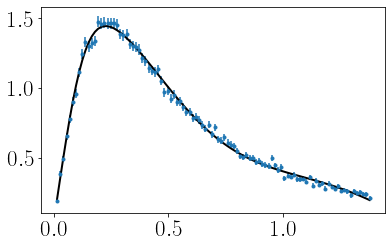

In [534]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.errorbar(bincenters, simDist, yerr = uncDist, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
# plt.plot(bincenters, skewnormfit(params, bincenters), 'k-', lw=2, label='frozen pdf')
plt.show()

In [535]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.180854238797632

In [536]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.reconGam<1.181)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.reconGam<1.181)]

In [537]:
len(dvcsSimInbFD)

44785

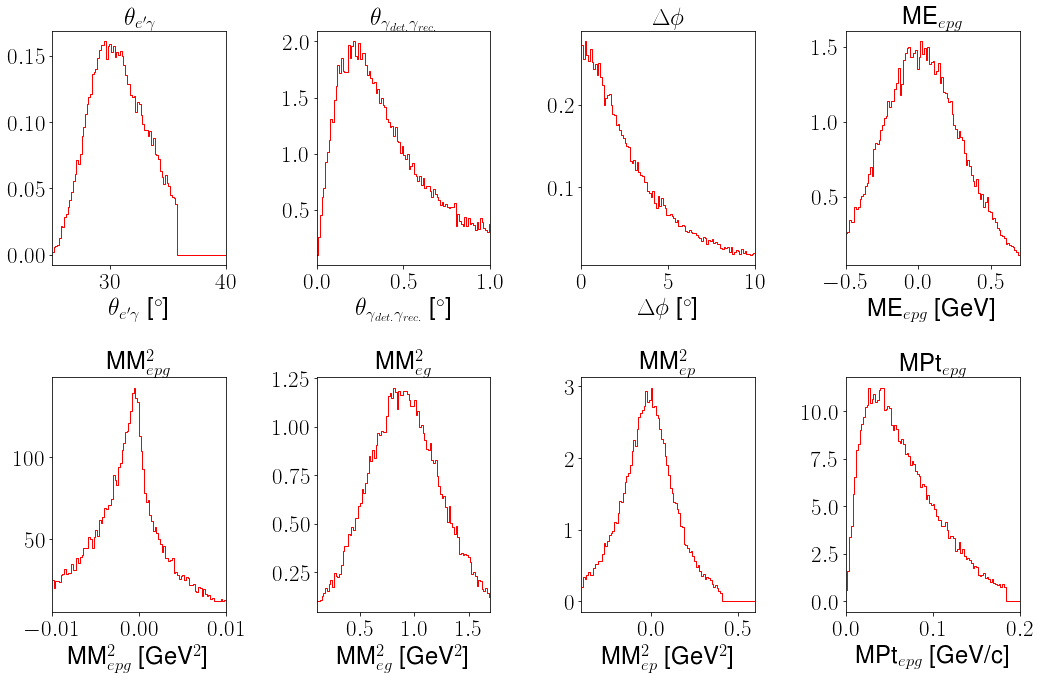

<Figure size 432x288 with 0 Axes>

In [538]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [539]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(0, 7, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coplanarity, bins = np.linspace(0, 7, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [10, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = loc + 2.5*scale
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = ub
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.005148769342142923 135.25660479943352 96
[ 4.37555076e+00  9.22013940e-02 -4.07576483e-02  4.04784558e-03] 0 10.964694177307722 0.005148769342142923
3.9612757518625585e-13 230.94323200256554 96


<ipython-input-101-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96


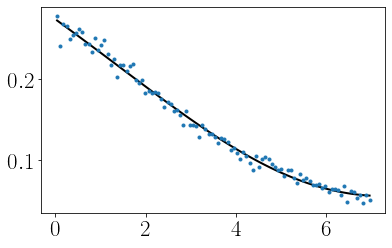

In [540]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = 0, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
# plt.plot(bincenters, halfnormfit(params, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [541]:
halfnorm.ppf(0.9974, scale = params_opt[0])

13.176768794146378

In [542]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coplanarity<13.178)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coplanarity<13.178)]

In [543]:
dvcsSimInbFD.MM2_epg.mean()+3*dvcsSimInbFD.MM2_epg.std()

0.023175192021144

In [544]:
dvcsSimInbFD.MM2_epg.mean()-3*dvcsSimInbFD.MM2_epg.std()

-0.026976815343831194

In [545]:
bkgSimInbFD.MM2_epg.mean()+3*bkgSimInbFD.MM2_epg.std()

0.031251695769829294

In [546]:
bkgSimInbFD.MM2_epg.mean()-3*bkgSimInbFD.MM2_epg.std()

-0.03421592264697636

In [547]:
dvcsSimInbFD.MM2_epg.std(), bkgSimInbFD.MM2_epg.std()

(0.008358667894162532, 0.010911269736134275)

In [548]:
mu1 = dvcsSimInbFD.MM2_epg.mean()
mu2 = bkgSimInbFD.MM2_epg.mean()
sigma1 = dvcsSimInbFD.MM2_epg.std()
sigma2 = bkgSimInbFD.MM2_epg.std()
w1 = (1-contInbFD)/len(dvcsSimInbFD)/ ((1-contInbFD)/len(dvcsSimInbFD)+(contInbFD)/len(bkgSimInbFD))
w2 = (contInbFD)/len(bkgSimInbFD)/ ((1-contInbFD)/len(dvcsSimInbFD)+(contInbFD)/len(bkgSimInbFD))

In [478]:
len(bkgSimInbFD)

34000

In [479]:
w1, w2

(0.6196240155281053, 0.38037598447189463)

In [549]:
mu = w1*mu1 + w2*mu2
print(mu)

-0.0017107649179854026


In [550]:
sigma = np.sqrt(w1**2*sigma1**2 + w2**2*sigma2**2)/np.sqrt(w1**2+ w2**2)

In [551]:
print(sigma)

0.00948496342813799


In [552]:
print(mu + 3*sigma, mu - 3*sigma)

0.026744125366428565 -0.03016565520239937


In [553]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_epg<0.267)&(dvcsSimInbFD.MM2_epg>-0.0302)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_epg<0.267)&(bkgSimInbFD.MM2_epg>-0.0302)]

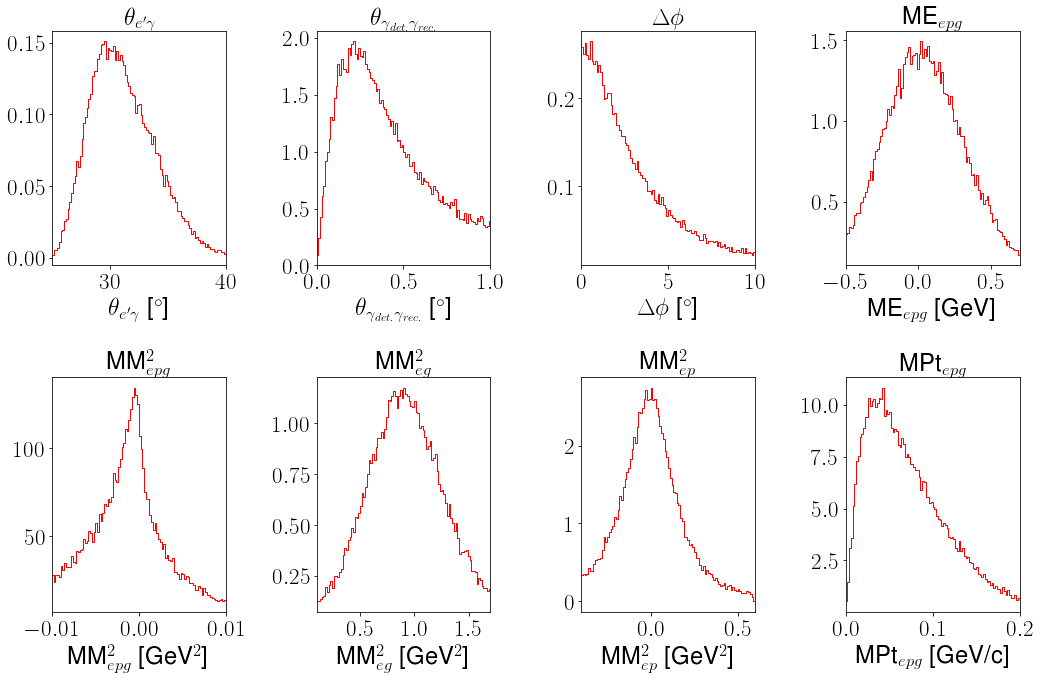

<Figure size 432x288 with 0 Axes>

In [288]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

## Refining π0 cuts

In [165]:
# parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPp/inb/epgg/"
parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/inb/epgg/"
epgg_4076 = pd.read_pickle(parent_epgg + "4076" + "_epgg.pkl")

In [166]:
pi0SimInb = copy(epgg_4076)

In [167]:
pi0SimInb.columns

Index(['Epx', 'Epy', 'Epz', 'Esector', 'event', 'Ppx', 'Ppy', 'Ppz', 'Psector',
       'Pp', 'Ptheta', 'Pphi', 'Pband', 'Pe', 'Gpx', 'Gpy', 'Gpz', 'GcX',
       'GcY', 'Gsector', 'GFidFX', 'GIndex', 'Gp', 'Gtheta', 'Gphi', 'Gpx2',
       'Gpy2', 'Gpz2', 'GcX2', 'GcY2', 'Gsector2', 'GFidFX2', 'GIndex2', 'Gp2',
       'Gtheta2', 'Gphi2', 'Ep', 'Ee', 'Etheta', 'Ephi', 'Ge', 'Ge2', 'Mpx',
       'Mpy', 'Mpz', 'Q2', 'nu', 'xB', 't1', 't2', 'W', 'MPt', 'phi1', 'phi2',
       'MM2_ep', 'MM2_egg', 'MM2_epgg', 'ME_epgg', 'Mpi0', 'reconPi', 'Pie',
       'coplanarity', 'coneAngle1', 'coneAngle2', 'closeness', 'config',
       'GenEpx', 'GenEpy', 'GenEpz', 'GenEp', 'GenEtheta', 'GenEphi', 'GenPpx',
       'GenPpy', 'GenPpz', 'GenPp', 'GenPtheta', 'GenPphi', 'GenGpx', 'GenGpy',
       'GenGpz', 'GenGp', 'GenGtheta', 'GenGphi', 'GenPipx', 'GenPipy',
       'GenPipz', 'GenPip', 'GenPitheta', 'GenPiphi'],
      dtype='object')

In [168]:
pi0SimInbFD = pi0SimInb.loc[pi0SimInb.config == 1]

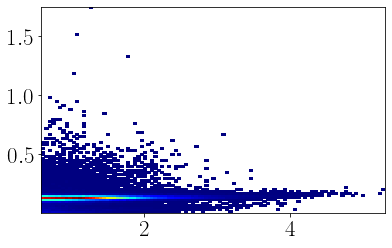

In [169]:
# pi0SimInbFD = pi0SimInbFD.loc[pi0SimInbFD.GFidFX==1, :]
plt.hist2d(pi0SimInbFD.Gp2, pi0SimInbFD.Mpi0, bins = 101, cmap = cmap, cmin =1)
plt.show()

In [170]:
pi0SimInbFD.Gp2.min()

0.6000025872449363

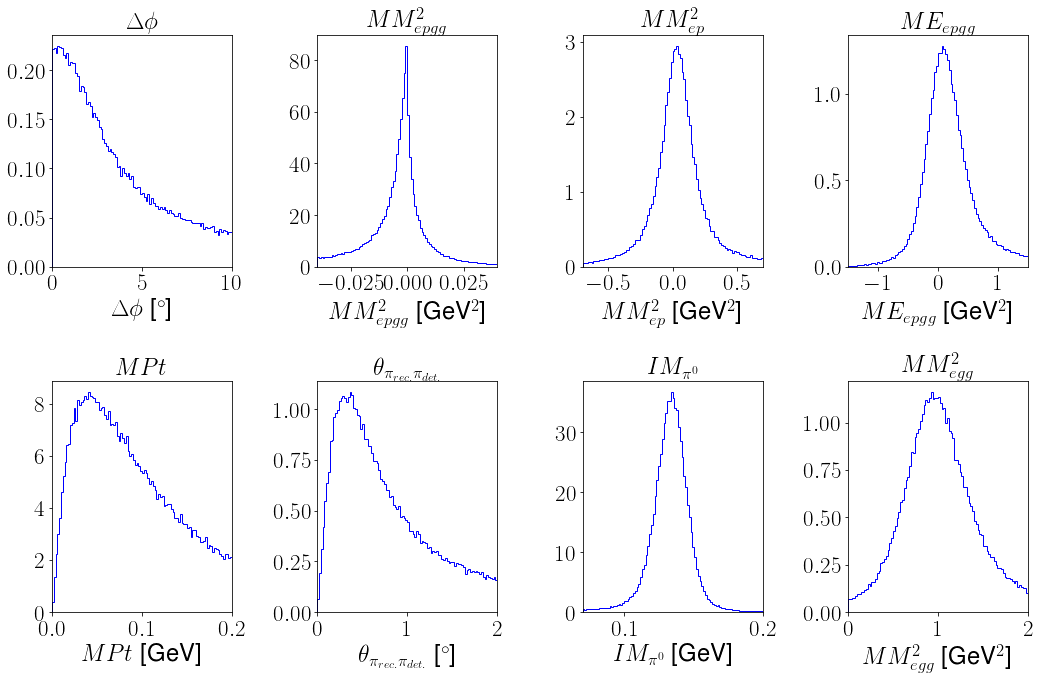

In [171]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [172]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb - 3*scale
        ub_opt = ub + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 7148.125248976427 95
0.4859808942253876 94.81748996698082 95
[ 1.34383210e-01  9.59317542e-03  1.67155485e+02 -2.40988528e+03
  8.71834783e+03] 0.11860384076764348 0.15016257953211418 0.4859808942253876
0.5210445077527777 93.6115509470953 95
[ 1.34344686e-01  9.39639186e-03  1.53112058e+02 -2.18476458e+03
  7.90620498e+03] 0.11888899723545605 0.14980037570608665 0.5210445077527777
0.26135803607458563 103.38262719433817 95
0.3911030379428707 98.18017948581507 95
0.47533296172991324 95.18605525590294 95
0.577615064253615 91.67185384153228 95
[ 1.34328297e-01  9.34164596e-03  1.59541025e+02 -2.28017477e+03
  8.27655363e+03] 0.1189626570994287 0.14969393758136434 0.577615064253615
0.5980112597859797 90.96787612604734 95
[ 1.34322658e-01  9.33469249e-03  1.62828722e+02 -2.33113069e+03
  8.47294715e+03] 0.11896845518775054 0.14967686078929718 0.5980112597859797
0.6860814230546317 87.83507108818986 95
[ 1.34312596e-01  9.33307536e-03  1.63534292e+02 -2.34455848e+03
  8.53406353e+03] 0.118

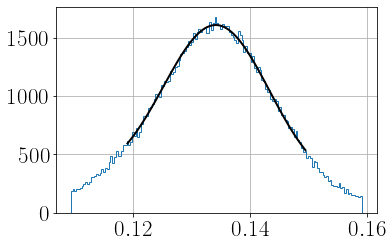

In [173]:
pi0SimInbFD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [174]:
print(ub_opt, lb_opt)

0.1776633650209755 0.09096182717887219


In [142]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.Mpi0<0.178) & (pi0SimInbFD.Mpi0>0.0910)]

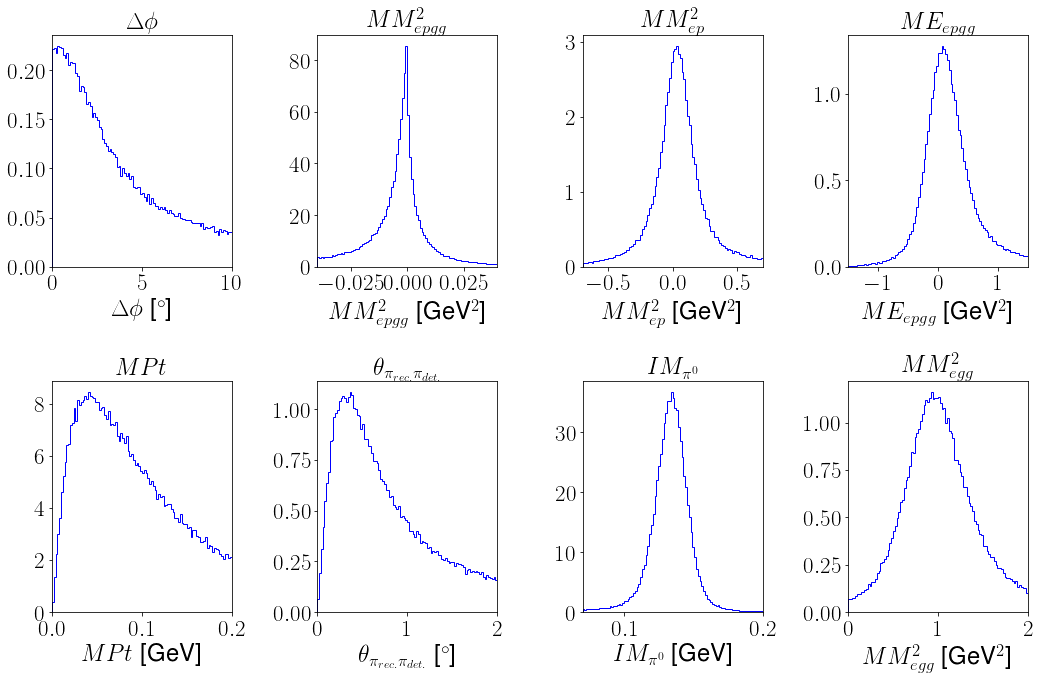

In [175]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [180]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 4918.016948468743 95
0.0 309.8414055642015 95
0.033123644382676676 121.84450933643795 95
[ 0.03221451  0.10384467 -0.18452654 -0.89777985 15.24737853] -0.18105636496642624 0.24548537506548845 0.033123644382676676
0.37877554203027985 98.63557507549375 95
[ 0.031983    0.10166452 -0.16537703 -0.99303051 17.38247902] -0.1768103932784187 0.24077640141078857 0.37877554203027985
0.5260378423198229 93.44041550806368 95
[ 0.03173566  0.10119327 -0.14954961 -0.95918065 17.60349109] -0.17608990217318765 0.2395612277188583 0.5260378423198229
0.687085062052178 87.79802124406993 95
[ 0.03177945  0.10108742 -0.14555171 -0.96684587 17.6549148 ] -0.17582872942286454 0.2393876370542974 0.687085062052178
0.4630988242534134 95.61147593075628 95
0.5003051158685148 94.32367283536375 95
0.4639747953861063 95.58093796275486 95
0.5282114172441519 93.365944183614 95


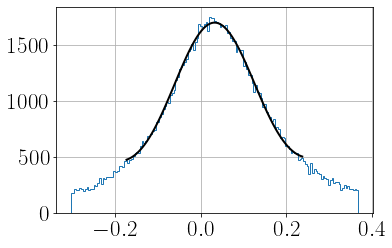

In [181]:
pi0SimInbFD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [182]:
print(ub_opt, lb_opt)

0.3350417204401866 -0.2714828128087537


In [183]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MM2_ep<0.335) & (pi0SimInbFD.MM2_ep>-0.271)]

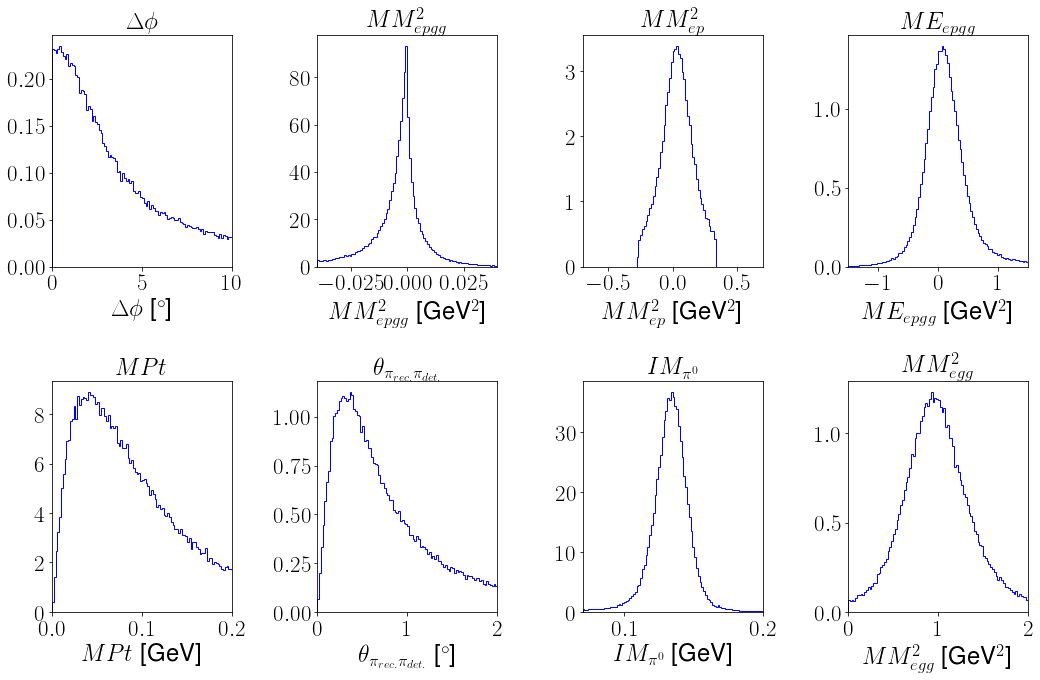

In [184]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [186]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 675.4144181618908 95
0.1563791164496997 108.87859491372247 95
[ 0.94200008  0.28826396  0.32415302 -0.77714373  0.47017366] 0.4678480559336877 1.416152096352419 0.1563791164496997
0.5830290379937098 91.48541895151976 95
[ 0.94023383  0.27716941  0.50076121 -1.1057382   0.65751305] 0.4843307186368759 1.3961369380730695 0.5830290379937098
0.7157811413294747 86.71983697149334 95
[ 0.93951529  0.27401277  0.55412381 -1.20109042  0.71394913] 0.4888043887247091 1.390226199133426 0.7157811413294747
0.47305400250408314 95.26513293624542 95
0.5725934588672805 91.8445516062935 95
0.43897585059745015 96.45800375890583 95
0.48218642681664536 94.94866822191491 95
0.6349273639207703 89.67803478305422 95
0.6022370202763024 90.82139354173901 95


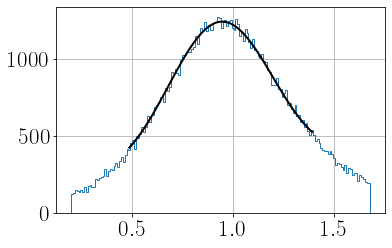

In [187]:
pi0SimInbFD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [190]:
print(ub_opt, lb_opt)

1.7615536160374499 0.1174769718206854


In [191]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MM2_egg<1.762) & (pi0SimInbFD.MM2_egg>0.117)]

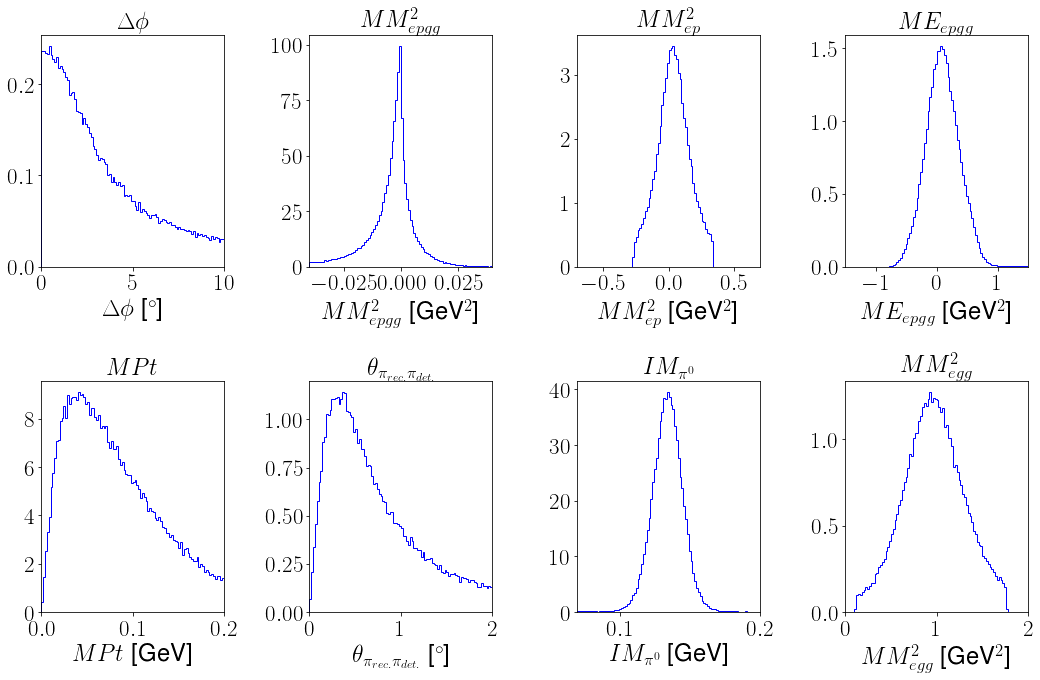

In [192]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [196]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInbFD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.025967378494560878 123.59054344388338 95
[ 0.06888442  0.25524808 -0.01830177  0.07703307  0.35224734] -0.4553310575783843 0.5930998878866525 0.025967378494560878
0.4247350263379659 96.96364447758381 95
[ 0.06636468  0.25105019 -0.01621199  0.09469983  0.46477563] -0.4492293604584143 0.5819587282015813 0.4247350263379659
0.35190774966484295 99.6497890564506 95
0.3763152850483875 98.7271594220688 95
0.4252190732669414 96.946375289114 95
[ 0.06595305  0.25013811 -0.01139761  0.10018986  0.47279451] -0.4477678140364455 0.5796739103433732 0.4252190732669414
0.44538148581472836 96.2320865568415 95
[ 0.06596452  0.25016083 -0.01117258  0.10027373  0.47117875] -0.44780300535784545 0.579732047272821 0.44538148581472836
0.40370437769148204 97.72025199272709 95
0.44488169998445803 96.24968171729783 95
0.4381956734847019 96.4855808881909 95


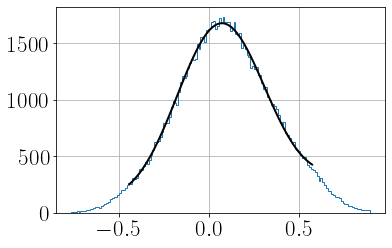

In [197]:
pi0SimInbFD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [199]:
print(ub_opt, lb_opt)

0.8164470025145092 -0.6845179605995335


In [200]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.ME_epgg<0.816) & (pi0SimInbFD.ME_epgg>-0.685)]

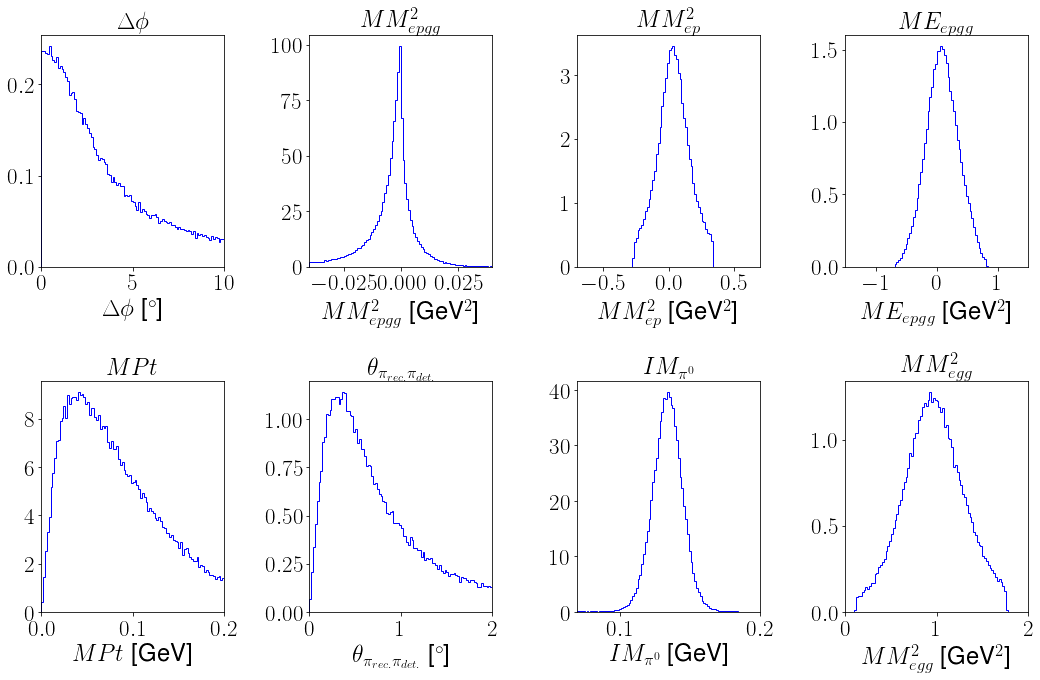

In [201]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [202]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbFD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.014
    ub = loc+3.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.434695932445776 0.014 0.20932366341049322
[ 4.22485328e+00  2.30296591e-03  5.91487707e-02 -5.70167207e+00
  1.40421026e+02 -5.73538210e+02] 0.014 0.20932366341049322 0.434695932445776
0.43095082311905974 0.014 0.24693709518997242
7.988036864159387e-05 0.014 0.2713526229994577
7.78627478128513e-05 0.014 0.2831043775140586
1.2652791259171181e-08 0.014 0.28747565661722413
3.5957478328185744e-08 0.014 0.2894004183025556
4.225419680814468e-09 0.014 0.2898907534729167
6.088899162648431e-09 0.014 0.2902196544752881
9.794858701894782e-09 0.014 0.29035409170584275
9.649031573744082e-09 0.014 0.2904625002575832


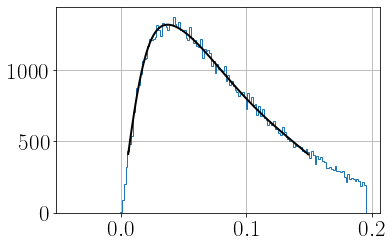

In [203]:
pi0SimInbFD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [204]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.1804267537886512

In [205]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MPt<0.180)]

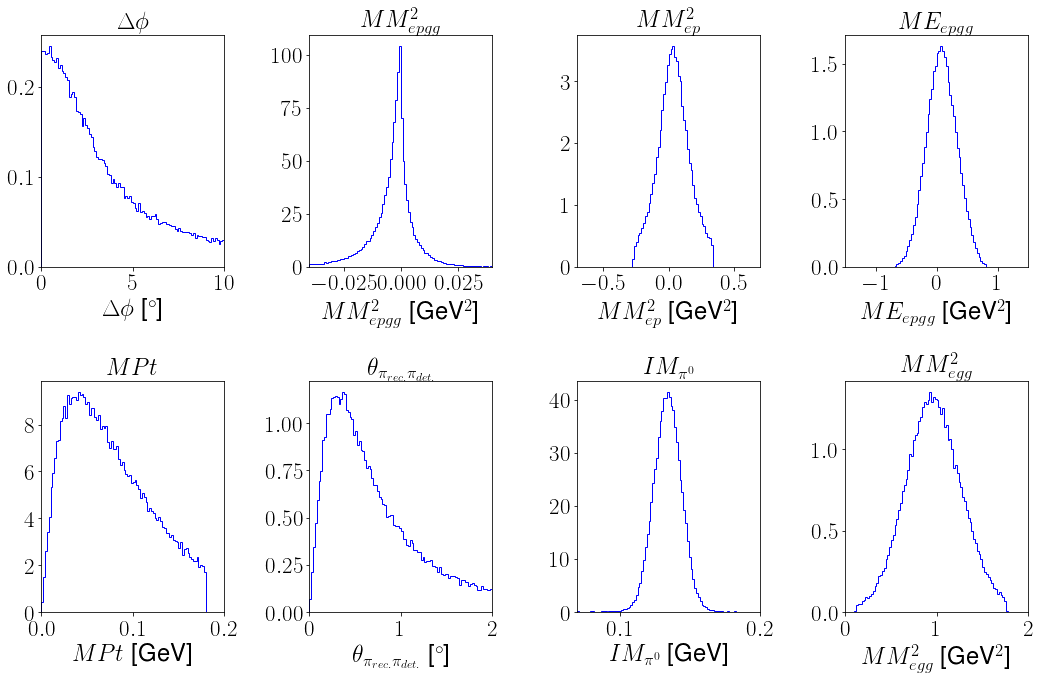

In [206]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [207]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbFD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

3.7934128060967964e-09 0.001 1.594242779929976
[ 4.48068862  0.05267496  0.51385594 -0.46955126  0.90983838 -0.31645914] 0.001 1.594242779929976 3.7934128060967964e-09
0.058474660067900586 0.001 1.4421381816533154
[ 3.65563818  0.04445928  0.46589297 -0.597272    1.42518729 -0.5966717 ] 0.001 1.4421381816533154 0.058474660067900586
0.1763174451977534 0.001 1.3940586358290752
[ 3.44331862  0.04270064  0.45045267 -0.6346789   1.63513871 -0.72629449] 0.001 1.3940586358290752 0.1763174451977534
0.04368367863674072 0.001 1.3777779886798656
0.13429338570803295 0.001 1.3675115513246079
0.1248776108019819 0.001 1.3610769739898287
0.1838199012274968 0.001 1.3589658575975065
[ 3.2657152   0.04102293  0.43931431 -0.66562614  1.80811199 -0.83800587] 0.001 1.3589658575975065 0.1838199012274968
0.17537576165883217 0.001 1.358656522873738
0.188714510378985 0.001 1.3591078231999638
[ 3.26848423  0.04108536  0.43934082 -0.66491645  1.80759045 -0.83795162] 0.001 1.3591078231999638 0.188714510378985
0.20

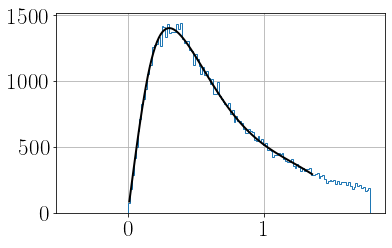

In [208]:
pi0SimInbFD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [209]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.3634773729422682

In [210]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.reconPi<1.363)]

In [213]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbFD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 3*params_opt[0]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.0210499311387 0.0
0 7.657987239543508 0.0050910153836865035
[ 3.0631949   0.03738069 -0.0253314   0.00389561] 0 7.657987239543508 0.0050910153836865035
0 9.531570968506843 1.0358644941810269e-08
0 23.091962401042387 0.0
0 652.4963452248192 0.0
0 10766.192535748216 0.0
0 166875.9843047812 0.0


<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0 2586577.7567241094 0.0
0 40091955.229223706 0.0
0 360827597.0630133 0.0


/usr/local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1835: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


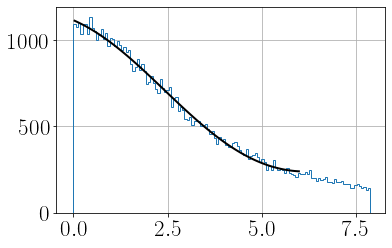

In [214]:
pi0SimInbFD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [215]:
ub_opt

9.189584687452209

In [216]:
pi0SimInbFD = pi0SimInbFD.loc[pi0SimInbFD.coplanarity < 9.190]

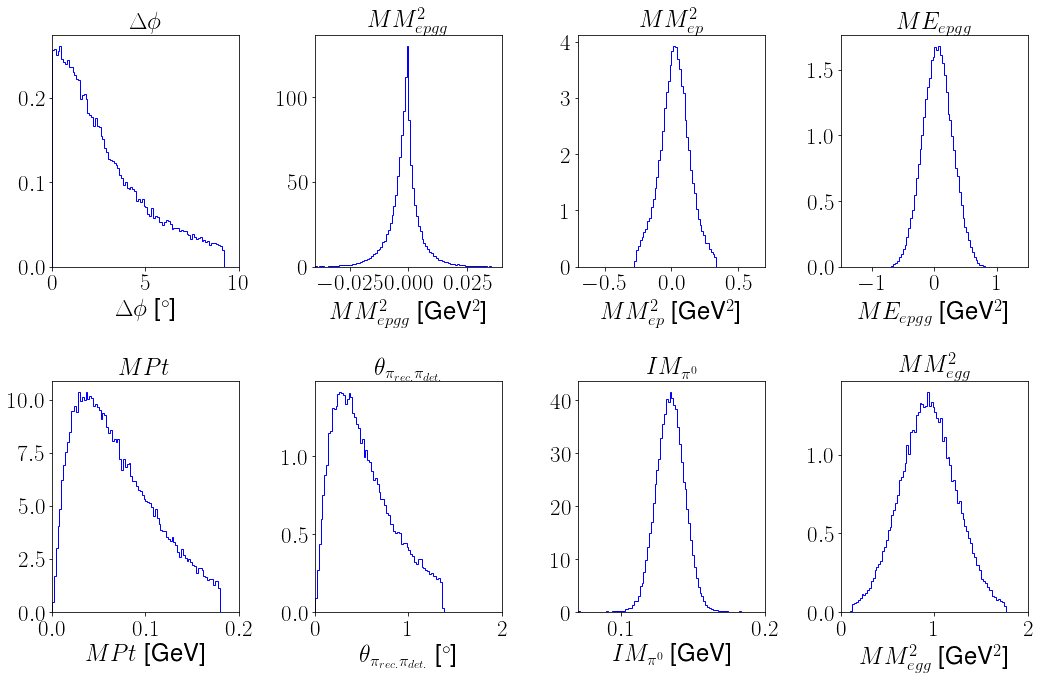

In [217]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [218]:
pi0SimInbFD.MM2_epgg.mean()+3*pi0SimInbFD.MM2_epgg.std()

0.018872240321286163

In [219]:
pi0SimInbFD.MM2_epgg.mean()-3*pi0SimInbFD.MM2_epgg.std()

-0.022403690464447873

In [220]:
pi0SimInbFD = pi0SimInbFD.loc[(pi0SimInbFD.MM2_epgg>-0.0224) & (pi0SimInbFD.MM2_epgg<0.0189)]

In [221]:
len(pi0SimInbFD)

69086

In [222]:
pi0SimInbCD = pi0SimInb.loc[pi0SimInb.config == 2]

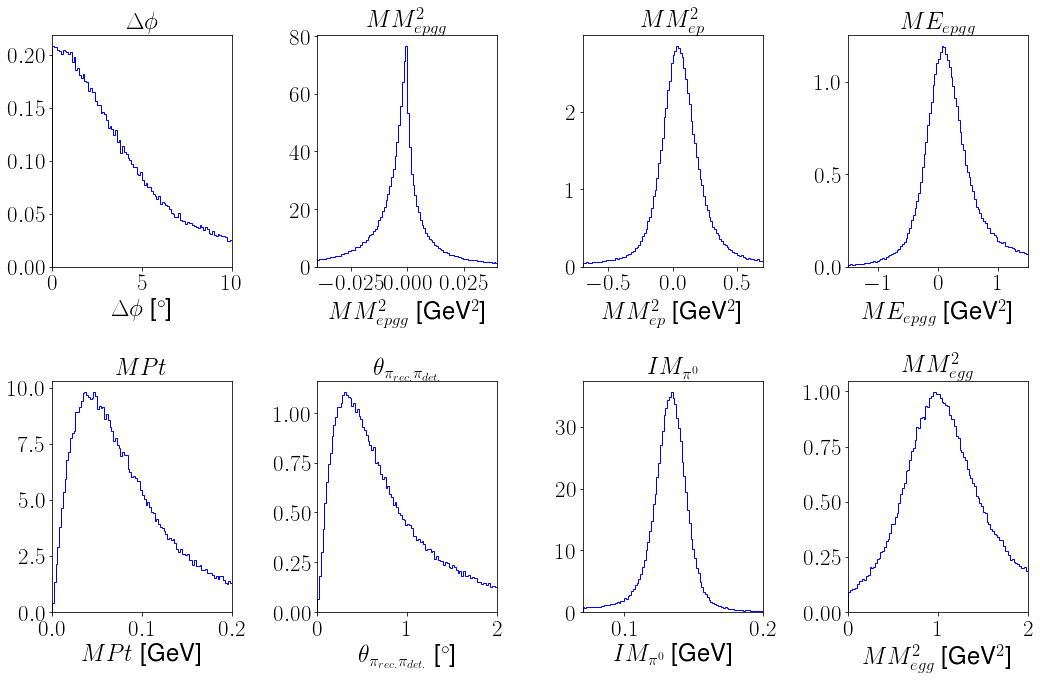

In [223]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [225]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 10411.625728914525 95
0.6848948847769607 87.87882077825833 95
[ 1.34045546e-01  9.54619433e-03  1.89960817e+02 -2.74994389e+03
  9.96824371e+03] 0.11834345369718191 0.14974763842840655 0.6848948847769607
0.979409059120292 69.01245639061416 95
[ 1.34044104e-01  9.34663490e-03  1.60197682e+02 -2.27421044e+03
  8.17765399e+03] 0.11867025767708267 0.14941795032235328 0.979409059120292
0.8812038427676434 79.03728396187444 95
0.9163773090805175 76.62393845932894 95
0.9296856925308257 75.52716255094964 95
0.9365293214874687 74.90463185458941 95
0.9207383361437363 76.2789905253984 95
0.8870627088642513 78.671854473074 95
0.9172782380309387 76.55372198754702 95


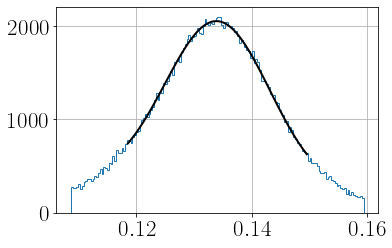

In [226]:
pi0SimInbCD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [227]:
print(ub_opt, lb_opt)

0.16208400871354123 0.1060041992858947


In [228]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.Mpi0<0.162) & (pi0SimInbCD.Mpi0>0.106)]

In [229]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 3450.461529705035 95
0.04124846897235068 120.22030828707753 95
[ 3.79988745e-02  1.12043922e-01 -4.16165072e-02  6.70170114e-03
  8.59063489e+00] -0.14629697759392846 0.22229472659120794 0.04124846897235068
0.7519031186193367 85.29865163634528 95
[ 0.03654938  0.10691125  0.08163253  0.10754898 11.29850736] -0.1393039775306615 0.21240273703454227 0.7519031186193367
0.3857665758308959 98.3766183796127 95
0.7882803064121415 83.76840634283651 95
[ 0.03565888  0.10609254  0.14966395  0.37242177 10.48762581] -0.13884782324965983 0.21016558935327412 0.7882803064121415
0.7025025287790099 87.2235158693429 95
0.8398673311693842 81.34028201320962 95
[ 0.0356815   0.10598275  0.15225115  0.35891332 10.62019949] -0.1386446122164852 0.21000760752673725 0.8398673311693842
0.8859150755890809 78.74438719226677 95
[ 0.03575706  0.10611274  0.15760629  0.36884869 10.27904502] -0.13878286461302822 0.21029698839005231 0.8859150755890809
0.8423846390765956 81.21117644500254 95
0.7758223874395894 84.305

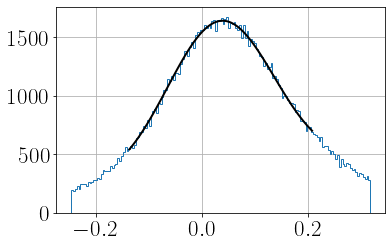

In [230]:
pi0SimInbCD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [231]:
print(ub_opt, lb_opt)

0.3540952841624804 -0.2825811603854562


In [232]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MM2_ep<0.354) & (pi0SimInbCD.MM2_ep>-0.283)]

In [234]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 396.10409922473207 95
0.11302452921832817 111.94327264733042 95
[ 0.97198728  0.33566144  0.16847667 -0.44360946  0.29424273] 0.4198733415938495 1.524101223432833 0.11302452921832817
0.8011639318592004 83.19525448150156 95
[ 0.9669845   0.32325441  0.27368948 -0.65678819  0.42441211] 0.43527831556657093 1.498690692801657 0.8011639318592004
0.40489664945847037 97.67700681195531 95
0.8727582712157578 79.54420171447836 95
[ 0.96420053  0.31915693  0.29218956 -0.68391043  0.45112795] 0.4392341012896601 1.489166954702928 0.8727582712157578
0.8818346377353956 78.99850816385687 95
[ 0.96438375  0.31924006  0.28600504 -0.66460051  0.44062731] 0.4392805775238623 1.4894869251740102 0.8818346377353956
0.909309892982033 77.15740277051958 95
[ 0.9640364   0.31901468  0.28981754 -0.67731292  0.44850964] 0.4393039395143684 1.4887688515932154 0.909309892982033
0.9332242542135608 75.21100143781693 95
[ 0.96440983  0.31939679  0.28218063 -0.65465527  0.43538721] 0.4390488538702856 1.4897708031407348

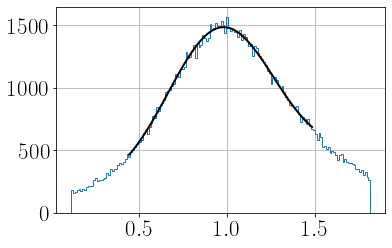

In [235]:
pi0SimInbCD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [236]:
print(ub_opt, lb_opt)

1.9220991719038423 0.006674398314006735


In [237]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MM2_egg<1.922) & (pi0SimInbCD.MM2_egg>0.007)]

In [238]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.4872212567992912 94.7746457921744 95
[0.0739752  0.2553108  0.02263454 0.13286828 0.48650535] -0.3459736894447304 0.4939240908097646 0.4872212567992912
0.8496399575163631 80.83209995741922 95
[0.07245275 0.24982772 0.06560094 0.16100327 0.51257216] -0.33847728171673575 0.48338278262542483 0.8496399575163631
0.24965152280660152 103.91490190831436 95
0.32611814223974667 100.6566548253299 95
0.25622173926074376 103.61437755246781 95
0.35194436625909675 99.64838436453523 95
0.21122868951471907 105.7787987331649 95
0.29383203236582744 101.97475856853298 95
0.21174069679456642 105.75259525335348 95


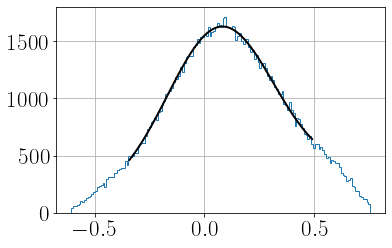

In [239]:
pi0SimInbCD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [240]:
print(ub_opt, lb_opt)

0.8219359119427385 -0.6770304110340493


In [241]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.ME_epgg<0.822) & (pi0SimInbCD.ME_epgg>-0.677)]

In [242]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.03204325262202934 0.005 0.17506870081430967
[ 3.46645901e+00  9.07129672e-03  5.53324680e-02 -3.26409068e+00
  8.99658246e+01 -4.12314480e+02] 0.005 0.17506870081430967 0.03204325262202934
0.004585611941999579 0.005 0.1878582737986519
0.02562100484697294 0.005 0.19124383427993738
0.025843339547260924 0.005 0.19271926481031026
0.0012099129703979639 0.005 0.1932758280586672
0.001254112912968064 0.005 0.19310238928789264
0.0025790589236768247 0.005 0.19313740323745388
0.0009937153962116252 0.005 0.1931525555211809
0.0009652526589321031 0.005 0.19313870778723063
0.0009238113527347824 0.005 0.19315747420987217


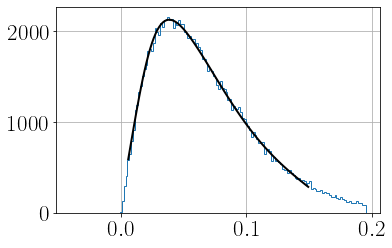

In [243]:
pi0SimInbCD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [244]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.17570246554034938

In [245]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MPt<0.176)]

In [246]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


4.890256642298141e-06 0.002 1.6182066203135026
[ 4.59939609  0.06750527  0.51690045 -0.37201416  0.7287922  -0.25683657] 0.002 1.6182066203135026 4.890256642298141e-06
0.04230828617046367 0.002 1.5149024801083624
[ 4.04609579  0.06141457  0.48449597 -0.45892878  1.07290171 -0.44177664] 0.002 1.5149024801083624 0.04230828617046367
0.029774737815501218 0.002 1.4836272436315205
0.19527563956147842 0.002 1.4709234477642807
[ 3.82835296  0.05831158  0.47087062 -0.50032687  1.26357539 -0.5554892 ] 0.002 1.4709234477642807 0.19527563956147842
0.07100229887786735 0.002 1.464831949339434
0.04876874449238233 0.002 1.4622627276607583
0.01149351334595794 0.002 1.4626498422185426
0.008618850064307515 0.002 1.4623753643327364
0.01096770471838271 0.002 1.4627543093982427
0.011186196789421787 0.002 1.4624287930654227


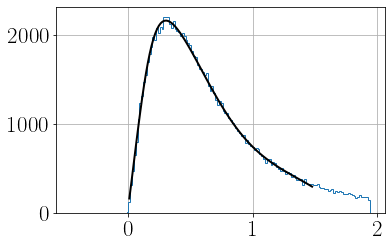

In [247]:
pi0SimInbCD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [248]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.4763166861650607

In [249]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.reconPi<1.476)]

In [252]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 3*params_opt[0]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 8.112884978011857 0.0
0 7.299984461421844 0.09141360008987554
[ 3.64999223e+00  2.02806762e-02 -1.09785553e-02  1.25285924e-03] 0 7.299984461421844 0.09141360008987554
0 7.020360002430472 0.11410764296648046
[ 3.51018000e+00  1.71843466e-02 -9.11439280e-03  1.19504721e-03] 0 7.020360002430472 0.11410764296648046
0 6.900953783535239 0.617884568124965
[ 3.45047689e+00  1.54997081e-02 -8.16533018e-03  1.16438346e-03] 0 6.900953783535239 0.617884568124965
0 6.854308761959039 0.4315254007832433
0 6.830075337180173 0.5150133730560408
0 6.82165976452163 0.9480215019860091
[ 3.41082988e+00  1.45979985e-02 -7.56497530e-03  1.14851860e-03] 0 6.82165976452163 0.9480215019860091
0 6.813005432547906 0.9527243334964283
[ 3.40650272e+00  1.43449838e-02 -7.48835435e-03  1.14921749e-03] 0 6.813005432547906 0.9527243334964283
0 6.806009489937626 0.957415549072516
[ 3.40300474e+00  1.41703624e-02 -7.42852531e-03  1.14919676e-03] 0 6.806009489937626 0.957415549072516
0 6.802236525767192 0.96891717458852

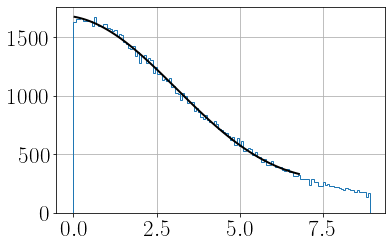

In [253]:
pi0SimInbCD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [254]:
ub_opt

10.203354788650788

In [255]:
pi0SimInbCD = pi0SimInbCD.loc[pi0SimInbCD.coplanarity < 10.203]

In [256]:
pi0SimInbCD.MM2_epgg.mean()+3*pi0SimInbCD.MM2_epgg.std()

0.020834111560290823

In [257]:
pi0SimInbCD.MM2_epgg.mean()-3*pi0SimInbCD.MM2_epgg.std()


-0.025044844162772507

In [258]:
pi0SimInbCD = pi0SimInbCD.loc[(pi0SimInbCD.MM2_epgg>-0.0250) & (pi0SimInbCD.MM2_epgg<0.0208)]

In [259]:
len(pi0SimInbCD)

106598

In [261]:
pi0SimInbCDFT = pi0SimInb.loc[pi0SimInb.config == 3]

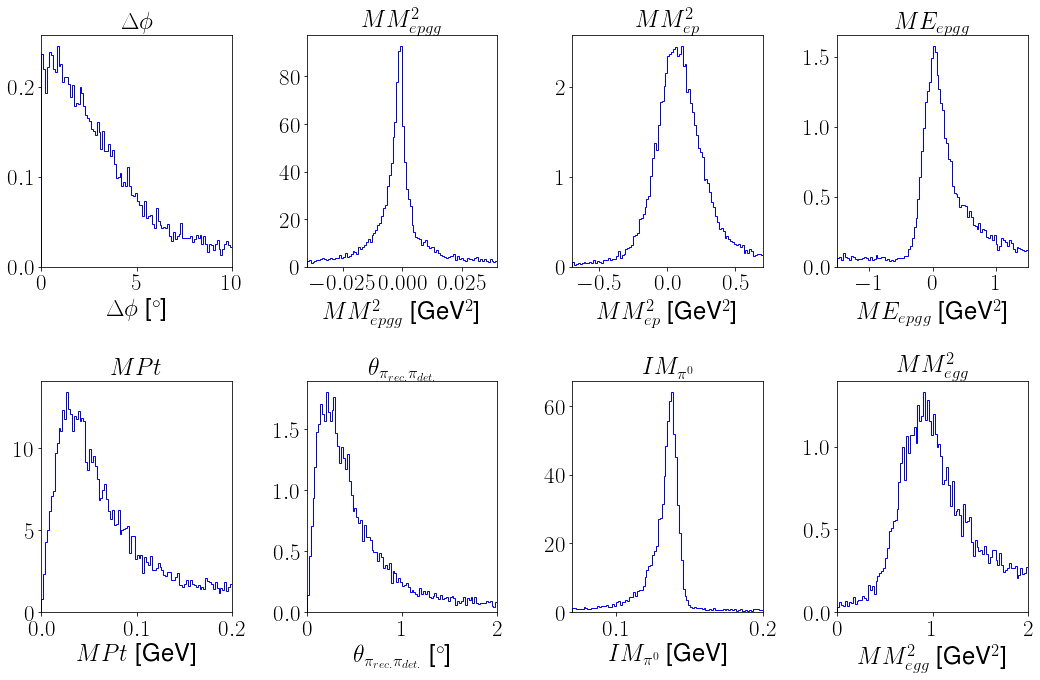

In [262]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [263]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 5077.463491757957 95
6.130445562302356e-08 186.6723895970038 95
[ 1.37436262e-01  4.93803843e-03  1.46450661e+03 -2.05380188e+04
  7.16336061e+04] 0.12729477102136108 0.14672369319630713 6.130445562302356e-08
0.02719308425688527 123.263937916062 95
[ 1.37730970e-01  4.37421405e-03  3.42204123e+03 -4.83883488e+04
  1.70668199e+05] 0.12874743218378681 0.14595796335865296 0.02719308425688527
0.08250236951656498 114.69954988744921 95
[ 1.37790431e-01  4.06640814e-03  6.00462335e+03 -8.57030520e+04
  3.05391254e+05] 0.12943904968598044 0.1454385054262911 0.08250236951656498
0.6929707240872403 87.57991655850694 95
[ 1.37733034e-01  3.90717721e-03  7.81945814e+03 -1.12203634e+05
  4.02112370e+05] 0.12970867294489719 0.1450816278100262 0.6929707240872403
0.3148755932979368 101.10765707269904 95
0.6087094877047093 90.59652434422102 95
0.6642959086602676 88.63000398989462 95
0.7509435569196544 85.33752364930105 95
[ 1.37691081e-01  3.90901890e-03  7.24349760e+03 -1.03935853e+05
  3.72540924e

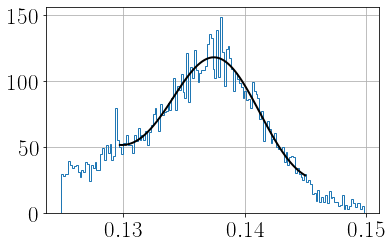

In [264]:
pi0SimInbCDFT.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [265]:
print(ub_opt, lb_opt)

0.15723617541702659 0.11814598640197435


In [267]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.Mpi0<0.157) & (pi0SimInbCDFT.Mpi0>0.118)]

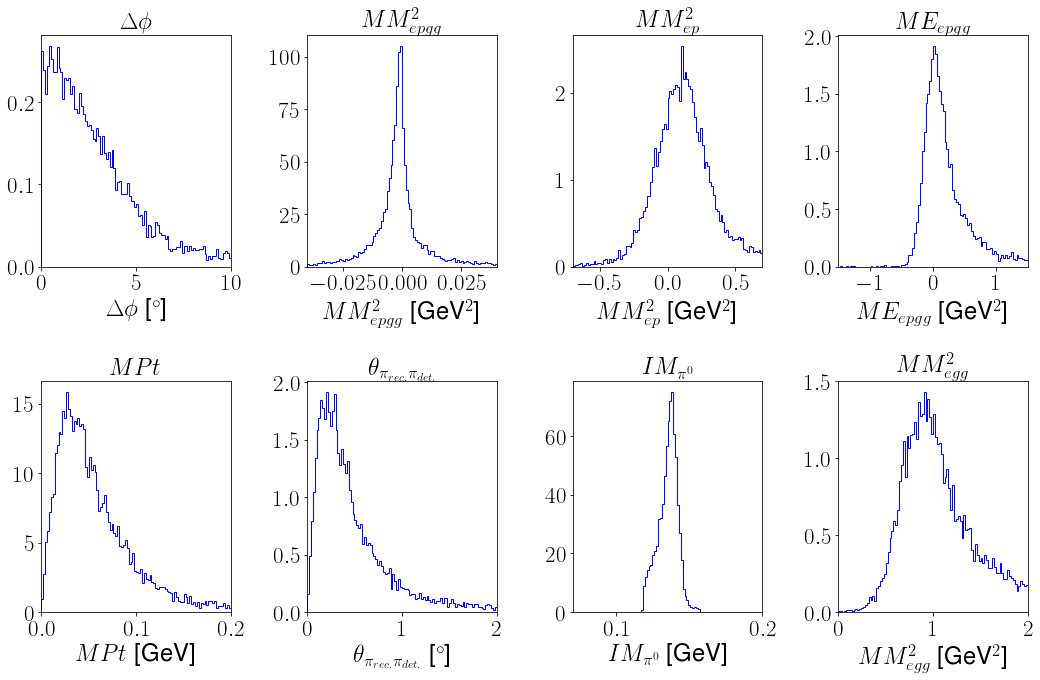

In [268]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()


In [269]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.002138037184914565 139.17195005122036 95
[ 0.09517267  0.17355149 -0.04014749  0.02253164  0.60336494] -0.2612585092726666 0.45160384573055234 0.002138037184914565
0.06762945246927421 116.35156149807557 95
[ 0.09895623  0.16476344 -0.00623492 -0.27741002  1.46867341] -0.23942650272877683 0.4373389558401003 0.06762945246927421
0.6519948454084156 89.07188174389434 95
[ 0.09948944  0.16280675  0.00709006 -0.35040824  1.73549044] -0.23487474672610115 0.43385362959189677 0.6519948454084156
0.18504660722855537 107.17916709461831 95
0.2570883619170016 103.57508348632611 95
0.24712597520608226 104.03168889187675 95
0.21842710771710294 105.4141189753086 95
0.2390591945032634 104.4096689162384 95
0.1796780698128494 107.48266175210577 95
0.31186093857447617 101.22997383814781 95


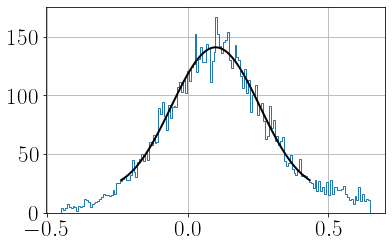

In [270]:
pi0SimInbCDFT.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [271]:
print(ub_opt, lb_opt)

0.9135231980135257 -0.71454431514773


In [272]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MM2_ep<0.914) & (pi0SimInbCDFT.MM2_ep>-0.715)]

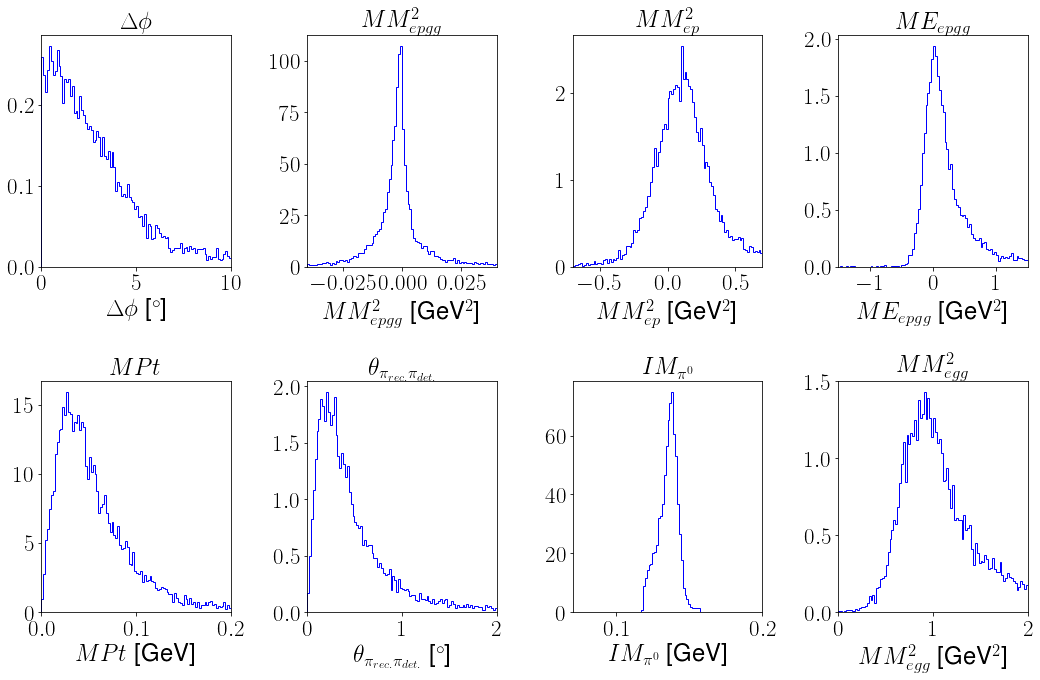

In [273]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [276]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.10227722960398744 112.83866034588164 95
[ 0.86628716  0.27182277 -0.62848403  0.80870463 -0.12594993] 0.4191784973218296 1.4986414714486718 0.10227722960398744
0.31945028007164833 100.92317911673861 95
[ 0.8723946   0.26085666 -0.36187128  0.25666018  0.15881322] 0.4433235853236212 1.4792379271473144 0.31945028007164833
0.12936585332357708 110.69929057790462 95
0.26958437123578216 103.0169613626125 95
0.6971452358184449 87.42432842668407 95
[ 0.86877859  0.25717715 -0.395181    0.3010156   0.16584315] 0.445759829417685 1.4670621068991712 0.6971452358184449
0.37409144716450515 98.8101527067403 95
0.6731046545384065 88.31062238908754 95
0.41684497923464725 97.24601651459963 95
0.6292451814698002 89.87827428013229 95


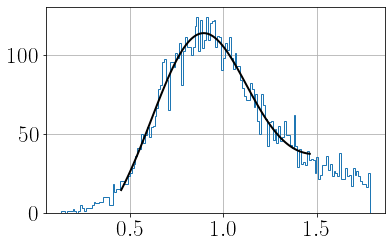

In [277]:
pi0SimInbCDFT.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [278]:
print(ub_opt, lb_opt)

2.1546643362881834 -0.41710714704321095


In [279]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MM2_egg<2.155) & (pi0SimInbCDFT.MM2_egg>-0.417)]

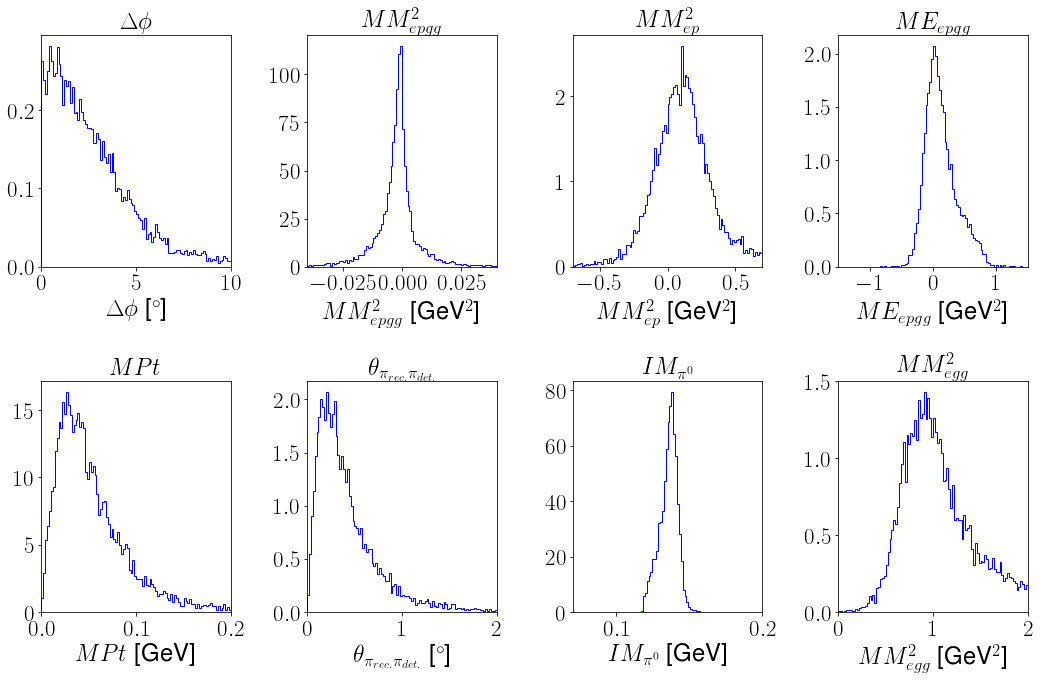

In [280]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [281]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.ME_epgg, bins = np.linspace(-0.6, 0.6, 101))
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.5016107870014306 94.27875517407281 95
[ 0.00893259  0.1670286  -0.08685215  0.90295873  2.08331477] -0.33410221495719516 0.3519674027689819 0.5016107870014306
0.3417080539594666 100.04370517692095 95
0.2504604584911939 103.87764619018668 95
0.21299331549027456 105.68866264957462 95
0.06461553900092443 116.7219099370336 95
0.29071382979799365 102.10603285365669 95
0.28946087328199577 102.15899811804384 95
0.42290183265733394 97.0291022722135 95
0.5380997493744809 93.02725298148245 95
[ 3.11343093e-03  1.59090093e-01 -5.90453560e-02  1.21046605e+00
  3.25321338e+00] -0.3236176745669284 0.3298445364268827 0.5380997493744809


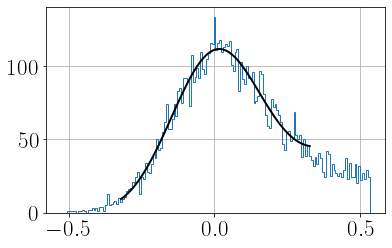

In [282]:
pi0SimInbCDFT.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [283]:
print(ub_opt, lb_opt)

0.7985638966745672 -0.7923370348146128


In [284]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.ME_epgg<0.799) & (pi0SimInbCDFT.ME_epgg>-0.792)]

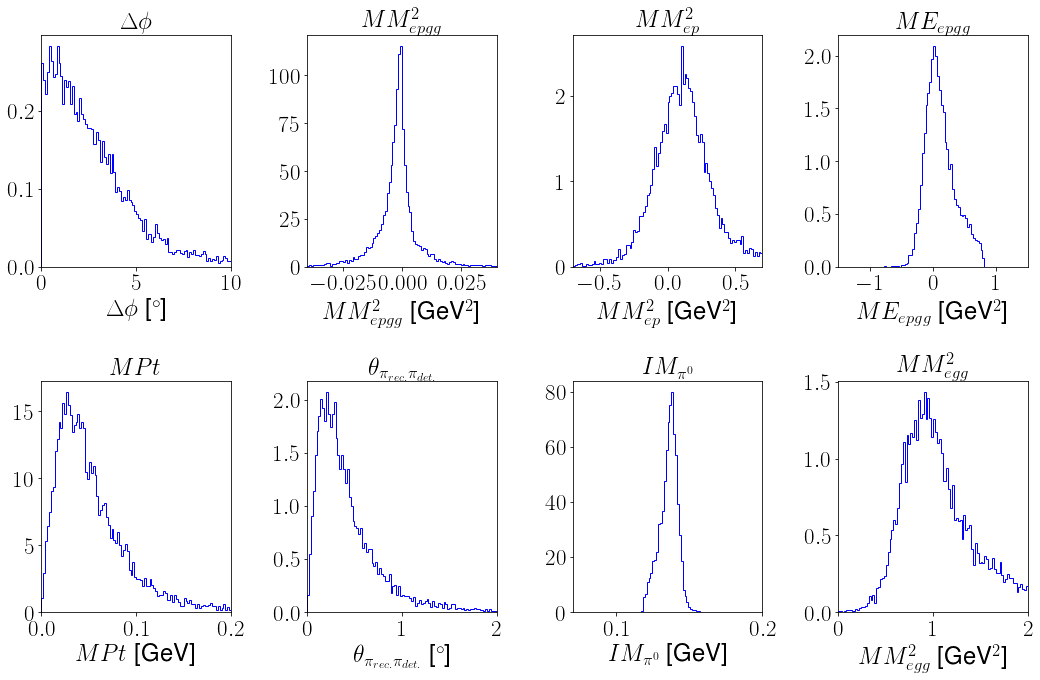

In [285]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [286]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


4.8457229357090625e-05 0.002 0.12817659072481002
[ 3.62181418e+00  8.01823541e-03  4.00527851e-02 -3.59629351e+00
  1.01951695e+02 -5.02184915e+02] 0.002 0.12817659072481002 4.8457229357090625e-05
0.0887695812947622 0.002 0.11962202096719776
[ 2.96624850e+00  7.00221793e-03  3.75399343e-02 -5.18118787e+00
  1.65358459e+02 -9.17956291e+02] 0.002 0.11962202096719776 0.0887695812947622
0.0237715785913164 0.002 0.12144024025581476
0.23556248278311154 0.002 0.11866772276272186
[ 2.94270134e+00  7.00099199e-03  3.72222436e-02 -5.30206970e+00
  1.73826947e+02 -9.83190477e+02] 0.002 0.11866772276272186 0.23556248278311154
0.07618205526498623 0.002 0.11969318971430415
0.030480576006424398 0.002 0.12076931707521227
0.002099108246092163 0.002 0.11718682080156105
0.42205647583584394 0.002 0.11631923161501428
[ 2.79113073e+00  6.76536101e-03  3.65179569e-02 -5.72963842e+00
  1.94590986e+02 -1.13393208e+03] 0.002 0.11631923161501428 0.42205647583584394
0.07920155747706104 0.002 0.11694861526809687
0

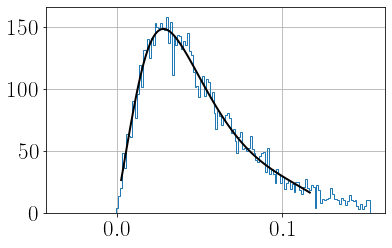

In [287]:
pi0SimInbCDFT.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [288]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.18935514532470316

In [289]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MPt<0.189)]

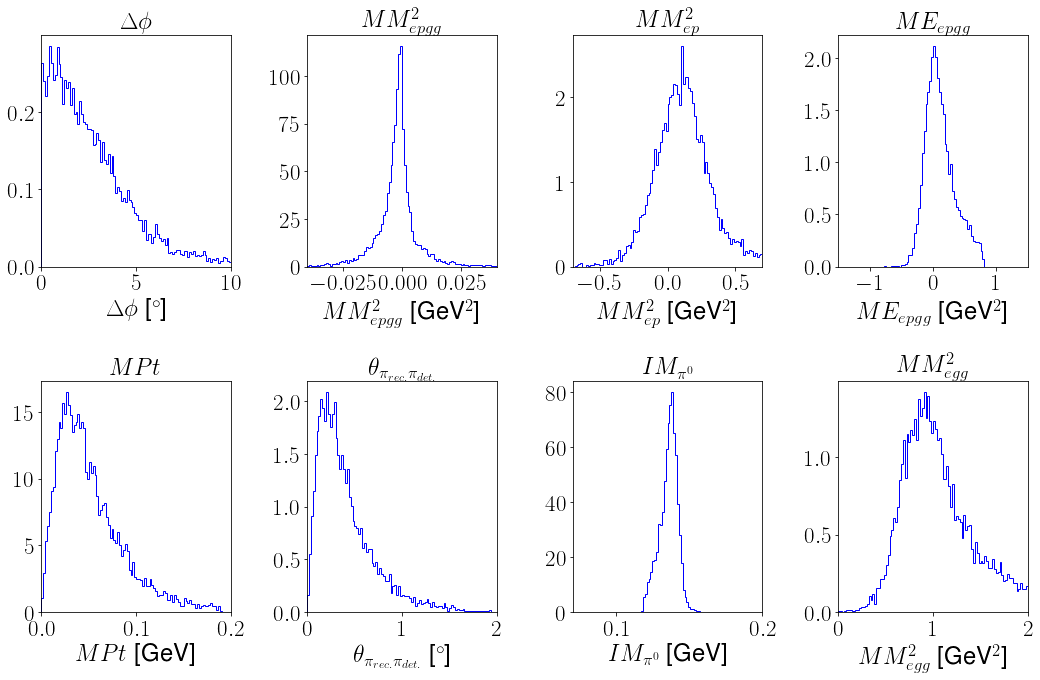

In [290]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [291]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 0.002 1.1022280133416398
0.3500321330352717 0.002 0.9318990392690478
[ 4.29790161  0.04262807  0.29642366 -0.66882394  2.41577293 -1.5696651 ] 0.002 0.9318990392690478 0.3500321330352717
0.6266770960554741 0.002 0.8969745513282762
[ 3.99019061  0.04077459  0.28539999 -0.74720286  3.00681882 -2.12605924] 0.002 0.8969745513282762 0.6266770960554741
0.35809854639931316 0.002 0.8895683554454451
0.13772321417507238 0.002 0.8980495766671911
0.4015293759563625 0.002 0.8906190780960004
0.20499541963801404 0.002 0.8967045328262879
0.411699610631152 0.002 0.8894387689641384
0.16963164492654415 0.002 0.8986022763318092
0.09564801342182438 0.002 0.889740320270167


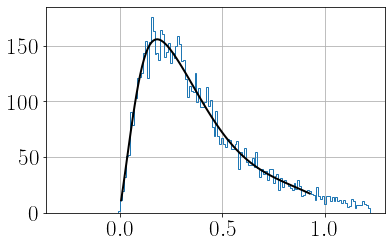

In [292]:
pi0SimInbCDFT.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [293]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.46777452474321

In [233]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.reconPi<1.468)]

In [294]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 7.47181715894285 0.5527459582749823
[ 2.98872686e+00 -1.36105224e-02  3.78085260e-03 -1.56357089e-04] 0 7.47181715894285 0.5527459582749823
0 7.6854824291474175 0.18649187284398727
0 7.7012058442710805 0.30857906650604006
0 7.731663768550522 0.4139211706257422
0 7.68745491217079 0.31318476597088085
0 7.718335862122977 0.36812941571695346
0 7.7156666530843845 0.6518312532068768
[ 3.08626666e+00  6.19554902e-03 -3.24744474e-03  3.99944879e-04] 0 7.7156666530843845 0.6518312532068768
0 7.717669647580272 0.6036352852188723
0 7.719181391126541 0.5309850110974486
0 7.7151489972104415 0.5657484244081326


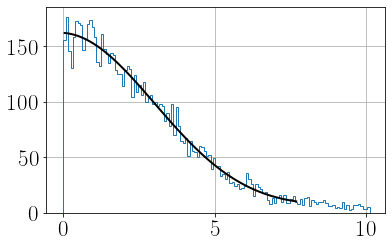

In [295]:
pi0SimInbCDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [296]:
print(ub_opt)

15.431333306168769


In [297]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[pi0SimInbCDFT.coplanarity<15.431]

In [298]:
pi0SimInbCDFT.MM2_epgg.mean()+5*pi0SimInbCDFT.MM2_epgg.std()

0.04403827633836784

In [299]:
pi0SimInbCDFT.MM2_epgg.mean()-5*pi0SimInbCDFT.MM2_epgg.std()

-0.04778841183462914

In [300]:
pi0SimInbCDFT = pi0SimInbCDFT.loc[(pi0SimInbCDFT.MM2_epgg>-0.0478) & (pi0SimInbCDFT.MM2_epgg<0.0440)]

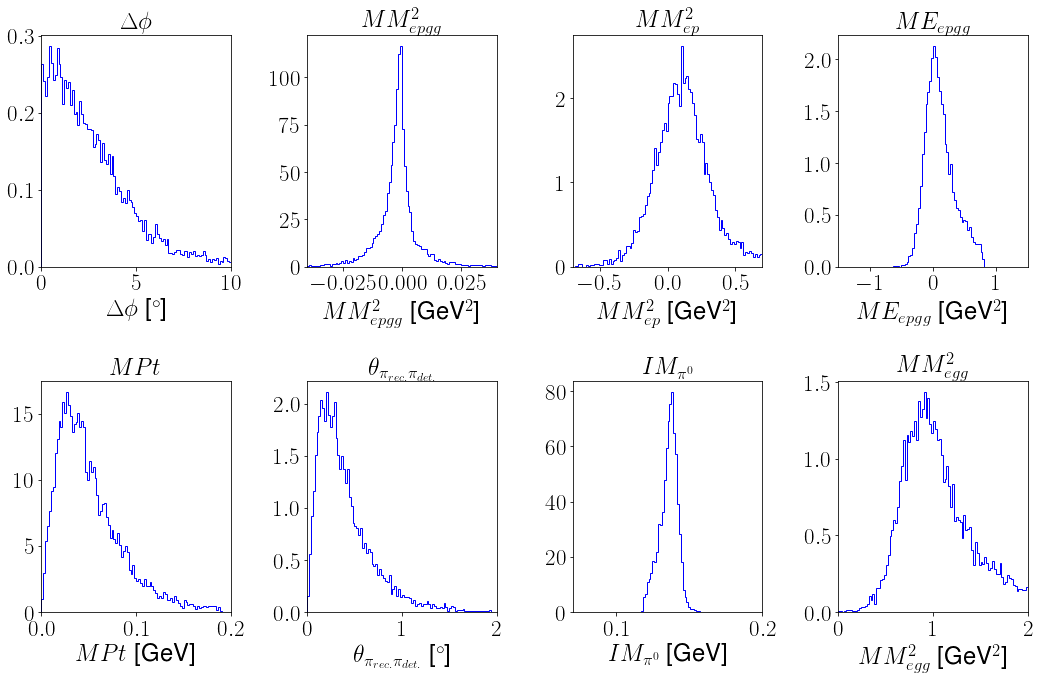

In [301]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimInbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

## DVCS overlaps

In [133]:
#parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPp/inb/epgg/"
parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/inb/epgg/"
epgg_3987 = pd.read_pickle(parent_epgg + "3987" + "_dvcs.pkl")
epgg_4076 = pd.read_pickle(parent_epgg + "4076" + "_dvcs.pkl")

In [134]:
pi0SimInb_forDVCS = copy(epgg_4076)

In [135]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS.loc[pi0SimInb_forDVCS.config == 1, :]

In [136]:
# pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[pi0SimInb_forDVCS_FD.GFidFX == 1, :]

In [137]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = params_opt[0]-3*params_opt[1]
        ub_opt = params_opt[0]+3*params_opt[1]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 3099.603851277545 95
0.13408881985765786 110.36194419791964 95
[ 1.35584888e-01  1.07878090e-02  2.06193058e+02 -3.06553387e+03
  1.13524589e+04] 0.11784052142341543 0.15332925491483446 0.13408881985765786
0.48233641841797525 94.94347959650366 95
[ 1.35571607e-01  1.01778430e-02  2.96189760e+02 -4.37820688e+03
  1.62113190e+04] 0.11883054494359294 0.1523126689408225 0.48233641841797525
0.14467276175954424 109.63678895096353 95
0.07951962066791829 115.01034122071715 95
0.055228434248620784 117.97476343635422 95
0.09390927050646636 113.58801896405181 95
0.05342165845567426 118.23597936909316 95
0.08625908724504794 114.32067173706295 95
0.09216222553908948 113.75104847104629 95


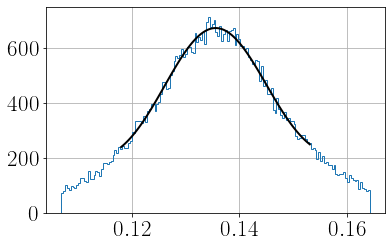

In [138]:
pi0SimInb_forDVCS_FD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [139]:
print(lb_opt, ub_opt)

0.10503807789565868 0.16610513598875676


In [140]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.Mpi0<0.166) & (pi0SimInb_forDVCS_FD.Mpi0>0.105)]

In [141]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = params_opt[0] - 3*params_opt[1]
        ub_opt = params_opt[0] + 3*params_opt[1]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 401.0928221085869 95
0.3278891275165764 100.58632121108072 95
[ 0.86135356  0.32097428  0.16832782 -0.40369949  0.27358178] 0.3333978507963351 1.3893092599330696 0.3278891275165764
0.32367929329750367 100.75382156263173 95
0.21510213573351455 105.58158085534332 95
0.19704938689654372 106.5217376034237 95
0.39464442418794266 98.0503805308714 95
[ 0.85770779  0.31605609  0.13552882 -0.23053907  0.19141969] 0.3378417804827881 1.3775738067452727 0.39464442418794266
0.27506967139246485 102.77671265253926 95
0.2732829327472748 102.85466536138705 95
0.27287314297208465 102.87258490833378 95
0.25828866243069337 103.5207897363463 95


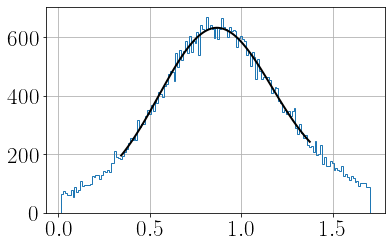

In [142]:
pi0SimInb_forDVCS_FD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [143]:
print(lb_opt, ub_opt)

-0.09046048947158591 1.805876076699647


In [144]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.MM2_egg<1.804) & (pi0SimInb_forDVCS_FD.MM2_egg>-0.0905)]

In [145]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = params_opt[0] - 3*params_opt[1]
        ub_opt = params_opt[0] + 3*params_opt[1]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 inf 95


<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.21854186067374515 105.40836894100742 95
[0.00418449 0.26928181 0.04735619 0.13534531 0.26395378] -0.4387446652628213 0.44711365346627857 0.21854186067374515
0.06595489028578683 116.55561845375419 95
0.02883756701196194 122.84533822440649 95
0.03522589960199585 121.39399227119547 95
0.0810612655687466 114.84856065581948 95
0.01919175773675441 125.68646463905046 95
0.13404587263468948 110.36497158150965 95
0.032081178734062465 122.0771305762533 95
0.03621370433197868 121.19024791969429 95


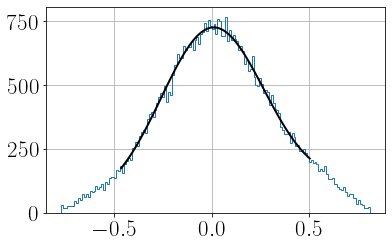

In [146]:
pi0SimInb_forDVCS_FD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [147]:
print(lb_opt, ub_opt)

-0.8036609313641158 0.8120299195675732


In [148]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.ME_epgg<0.812) & (pi0SimInb_forDVCS_FD.ME_epgg>-0.804)]

In [149]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = params_opt[0] + 3*params_opt[1]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.12708077494822034 0.002 0.17079256795658102
[ 4.79799028e+00  1.88059586e-03  5.63039907e-02 -7.16311999e+00
  1.70183764e+02 -6.89359360e+02] 0.002 0.17079256795658102 0.12708077494822034
0.017795675960524338 0.002 0.17775059272141816
0.05002129294111912 0.002 0.1810098053078954
0.03854421060031599 0.002 0.18537514985529877
0.04669072542090846 0.002 0.18757661590693248
0.02090228097627722 0.002 0.1880773837672777
0.06577579690600133 0.002 0.18863913691232
0.021088231451529937 0.002 0.18926122353666622
0.023495134835703202 0.002 0.18896322816610092
0.036409478253122574 0.002 0.18840892768255543


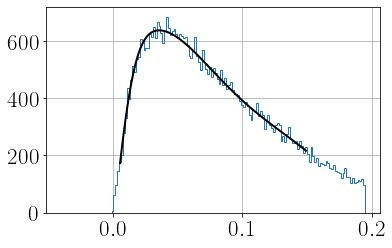

In [150]:
pi0SimInb_forDVCS_FD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [151]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.17143746026861242

In [152]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.MPt<0.171)]

In [153]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = params_opt[0] + 3*params_opt[1]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.002 1.3486046315181126
0.0033174081055077353 0.002 1.1779695628430127
[ 3.69674366  0.04574444  0.37740837 -0.64829964  1.82200499 -0.90225535] 0.002 1.1779695628430127 0.0033174081055077353
0.018681319549870734 0.002 1.0845511414345705
[ 3.06644327  0.03909948  0.34848389 -0.80260842  2.62799206 -1.4958715 ] 0.002 1.0845511414345705 0.018681319549870734
0.012109955592093491 0.002 1.0271982728136058
0.01798541022100264 0.002 1.027348061066251
0.009536012663498794 0.002 1.0307339431987042
0.00014038799145954517 0.002 1.0312443514160183
0.0003603176866354696 0.002 1.0294471255935351
0.0005396382706712721 0.002 1.0261904581038859
0.025900508535091737 0.002 1.0204961969082598
[ 2.68457754  0.0363195   0.3280589  -0.89774626  3.2979009  -2.04881082] 0.002 1.0204961969082598 0.025900508535091737


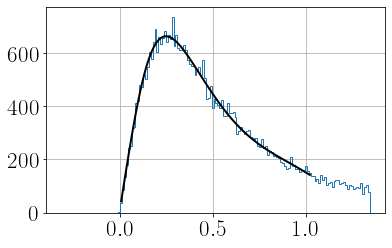

In [154]:
pi0SimInb_forDVCS_FD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [155]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.0242537043081152

In [156]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.reconPi<1.024)]

In [157]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_FD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 3*params_opt[0]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 5.936501449508751 0.0
0 7.932261922861365 0.16732056119081695
[ 3.17290477  0.05984614 -0.03625527  0.00494605] 0 7.932261922861365 0.16732056119081695
0 11.152810253158108 4.685108400315219e-05
0 300.28392826714935 0.0
0 5555.265890334023 0.0
0 86106.62130615434 0.0


<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0 1334652.6302453934 0.0
0 20687115.76880359 0.0
0 320650294.4164557 0.0
0 320668642.1734756 0.0


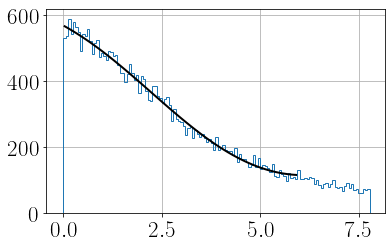

In [158]:
pi0SimInb_forDVCS_FD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [159]:
ub_opt

9.518714307433637

In [160]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[pi0SimInb_forDVCS_FD.coplanarity < 9.519]

In [161]:
pi0SimInb_forDVCS_FD.MM2_epgg.mean()+3*pi0SimInb_forDVCS_FD.MM2_epgg.std()

0.024229444604201948

In [162]:
pi0SimInb_forDVCS_FD.MM2_epgg.mean()-3*pi0SimInb_forDVCS_FD.MM2_epgg.std()

-0.027881858273696138

In [163]:
pi0SimInb_forDVCS_FD = pi0SimInb_forDVCS_FD.loc[(pi0SimInb_forDVCS_FD.MM2_epgg>-0.0279) & (pi0SimInb_forDVCS_FD.MM2_epgg<0.0242)]

In [164]:
len(pi0SimInb_forDVCS_FD)

34087

In [64]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS.loc[pi0SimInb_forDVCS.config == 2]

In [67]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 4963.749438063312 95
0.7788798265947399 84.17539828177276 95
[ 1.35038966e-01  1.10021325e-02  1.70944646e+02 -2.53479036e+03
  9.36963790e+03] 0.11694206814800834 0.1531358632525287 0.7788798265947399
0.9561155456900158 72.79778490236112 95
[ 1.35039933e-01  1.06151067e-02  1.70489815e+02 -2.49886870e+03
  9.23385203e+03] 0.11757963626723908 0.15250022974392088 0.9561155456900158
0.9051602331720087 77.45746019928717 95
0.9782790275391704 69.26012948716146 95
[ 1.35122100e-01  1.04206467e-02  2.12542042e+02 -3.09919570e+03
  1.13920522e+04] 0.11798166156105787 0.15226253869515294 0.9782790275391704
0.969491919420623 70.900446148114 95
0.9629286481023176 71.89740692814614 95
0.9170567740773813 76.57103146190276 95
0.85146474658025 80.73504692761055 95
0.8864021932382347 78.71365869678141 95


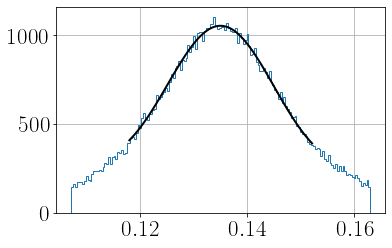

In [68]:
pi0SimInb_forDVCS_CD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [70]:
print(ub_opt, lb_opt)

0.166384040314507 0.10386015994170383


In [71]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[(pi0SimInb_forDVCS_CD.Mpi0<0.166) & (pi0SimInb_forDVCS_CD.Mpi0>0.104)]

In [73]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


1.2800309815430566e-05 164.48292820964429 95
[ 0.90365157  0.44338088  0.00782848 -0.1002445   0.07961246] 0.1743549223200721 1.6329482092866603 1.2800309815430566e-05
0.44086097921528056 96.39142561875086 95
[ 0.88824399  0.40781025  0.07683891 -0.2185216   0.17236189] 0.21745581545844517 1.5590321647646683 0.44086097921528056
0.18812630135623232 107.00778380936664 95
0.29993215407733165 101.7201107331384 95
0.06099706762769419 117.18580177732395 95
0.2072787934428787 105.98235838134697 95
0.12397048232089192 111.09614764444204 95
0.10483996349204217 112.6187675834962 95
0.12271346896888213 111.1904703437788 95
0.09655368261237463 113.34573825053579 95


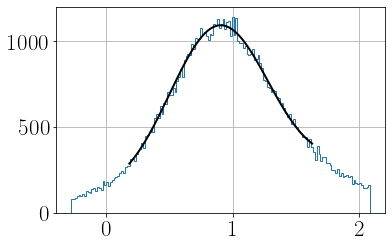

In [74]:
pi0SimInb_forDVCS_CD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [75]:
print(ub_opt, lb_opt)

2.111674750749509 -0.33518677052639534


In [76]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[(pi0SimInb_forDVCS_CD.MM2_egg<2.112) & (pi0SimInb_forDVCS_CD.MM2_egg>-0.335)]

In [78]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 2408.0260646519887 95
0.0804592441227302 114.91144016914457 95
[0.01792288 0.29753878 0.03864557 0.14023367 0.20181859] -0.47148487334361155 0.5073306248862416 0.0804592441227302
0.3756541429107023 98.75181215929771 95
[0.0153441  0.29029263 0.0705587  0.16850328 0.25224839] -0.4621447923092729 0.49283298753763194 0.3756541429107023
0.5027518190562471 94.23951263850292 95
[0.01505099 0.28862739 0.07985089 0.17356846 0.26435214] -0.4596988227364483 0.489800799524725 0.5027518190562471
0.6375291461819261 89.58610260131195 95
[0.01481088 0.28886654 0.08523023 0.17746733 0.23487659] -0.4603322924295232 0.4899540611656314 0.6375291461819261
0.6166518259708818 90.31966173530081 95
0.584857868537537 91.4223783122552 95
0.6427857285434283 89.39986737521555 95
[0.01478109 0.28918404 0.08557531 0.17734643 0.22622524] -0.4608843389880359 0.49044651088988533 0.6427857285434283
0.5999680340070332 90.90007698832605 95
0.6070559522763092 90.65403342765332 95


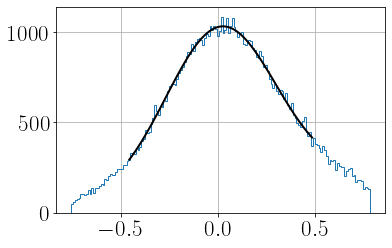

In [79]:
pi0SimInb_forDVCS_CD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [80]:
print(ub_opt, lb_opt)

0.8823332203384925 -0.8527710484366428


In [81]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[(pi0SimInb_forDVCS_CD.ME_epgg<0.882) & (pi0SimInb_forDVCS_CD.ME_epgg>-0.853)]

In [83]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.1691232837566744 0.001 0.17640510694518055
[ 3.22740209e+00  8.22701408e-03  5.60593643e-02 -3.56276515e+00
  9.53932750e+01 -4.17436045e+02] 0.001 0.17640510694518055 0.1691232837566744
0.050020626227706755 0.001 0.18354055826183757
0.005444628700587484 0.001 0.18716693244971808
0.000167122454431734 0.001 0.1887625258458052
2.664349656988918e-05 0.001 0.1893131667733086
0.00014298907550081008 0.001 0.1898969038866771
0.0002952124907219522 0.001 0.19023984742665442
5.5548987849096676e-05 0.001 0.1902717993960948
3.0138852919137094e-05 0.001 0.19038534843034993
0.00011550184894271176 0.001 0.19053036994960715


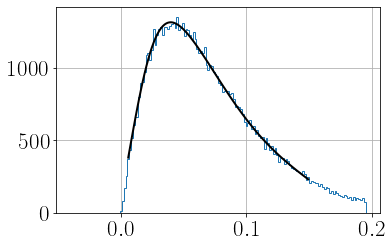

In [84]:
pi0SimInb_forDVCS_CD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [85]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.17704719736539323

In [86]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[(pi0SimInb_forDVCS_CD.MPt<0.177)]

In [87]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 0.002 1.3935602558515534
2.9009941237001513e-06 0.002 1.2386401858783436
[ 3.59535847  0.05854309  0.3933657  -0.54803439  1.52915775 -0.75475313] 0.002 1.2386401858783436 2.9009941237001513e-06
0.0013080167535737264 0.002 1.1773660473928265
[ 3.21561957  0.05377599  0.37453002 -0.64246665  1.99963917 -1.08513093] 0.002 1.1773660473928265 0.0013080167535737264
0.03796810077700641 0.002 1.1481995168340609
[ 3.02481605  0.05127544  0.36564136 -0.69021785  2.26127246 -1.28191316] 0.002 1.1481995168340609 0.03796810077700641
0.04003399521625961 0.002 1.1301594457329802
[ 2.912721    0.04972341  0.36014535 -0.72256146  2.43244728 -1.41190994] 0.002 1.1301594457329802 0.04003399521625961
0.006247401150672016 0.002 1.117244702240426
0.1255109952189637 0.002 1.1078277141412483
[ 2.77268007  0.04744793  0.35345993 -0.76500781  2.66183733 -1.59077724] 0.002 1.1078277141412483 0.1255109952189637
0.006550069358290833 0.002 1.1056150600908947
0.016907648750893234 0.002 1.1027321546066853
0.0070

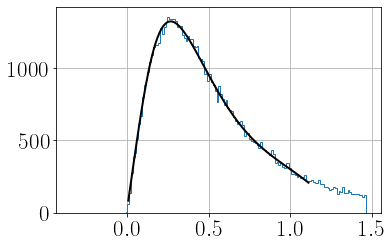

In [88]:
pi0SimInb_forDVCS_CD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [89]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.1118761587902861

In [90]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[(pi0SimInb_forDVCS_CD.reconPi<1.111)]

In [93]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 7.301991464718087 1.521572867702048e-09
[ 2.92079659e+00 -3.42758939e-02  1.12556769e-02 -6.58239230e-04] 0 7.301991464718087 1.521572867702048e-09
0 8.05984570433554 0.47265803087708136
[ 3.22393828e+00  1.73329988e-02 -1.02953425e-02  1.32088170e-03] 0 8.05984570433554 0.47265803087708136
0 8.213747177233925 0.07877743974664808
0 8.288273264820543 0.0022654648330940885
0 8.314857267793737 0.008688096906856235
0 8.324054460471103 6.171069116489569e-05
0 8.333786197739585 0.00011815132240955428
0 8.328200030606029 0.0003485642511028564
0 8.327077486666125 0.00030271764620015684
0 8.331571219470774 0.00016181896153166786


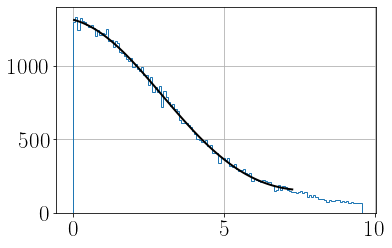

In [94]:
pi0SimInb_forDVCS_CD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [95]:
print(ub_opt)

9.719481062678549


In [96]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[pi0SimInb_forDVCS_CD.coplanarity<9.719]

In [97]:
pi0SimInb_forDVCS_CD.MM2_epgg.mean()-3*pi0SimInb_forDVCS_CD.MM2_epgg.std()

-0.031114870298070068

In [98]:
pi0SimInb_forDVCS_CD.MM2_epgg.mean()+3*pi0SimInb_forDVCS_CD.MM2_epgg.std()

0.026580217406220383

In [99]:
pi0SimInb_forDVCS_CD = pi0SimInb_forDVCS_CD.loc[(pi0SimInb_forDVCS_CD.MM2_epgg>-0.0311) & (pi0SimInb_forDVCS_CD.MM2_epgg<0.0266)]

In [100]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS.loc[pi0SimInb_forDVCS.config == 3]

In [104]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 3725.9183885722837 95
0.0 260.0934451053709 95
0.03546014054487234 121.34523785219206 95
[ 1.37400366e-01  4.90041601e-03  2.29272157e+03 -3.26756559e+04
  1.16038984e+05] 0.1260002931415681 0.14880043787966032 0.03546014054487234
0.35774517834322994 99.42667123205358 95
[ 1.37479768e-01  4.71979986e-03  2.72109366e+03 -3.87385561e+04
  1.37525814e+05] 0.12649987146737277 0.14845966422384585 0.35774517834322994
0.47702305454909755 95.12745714876942 95
[ 1.37495530e-01  4.65528696e-03  2.96236584e+03 -4.22093258e+04
  1.50014102e+05] 0.1266657125912816 0.1483253464437719 0.47702305454909755
0.2739213980737475 102.82677675412953 95
0.0806142655781168 114.89521256088722 95
0.26574484079686933 103.1868092932669 95
0.6029359208553522 90.79714237018159 95
[ 1.37538970e-01  4.61723475e-03  3.15769419e+03 -4.49624554e+04
  1.59707137e+05] 0.12679767577266837 0.1482802642458491 0.6029359208553522
0.5295947873461375 93.31855276420289 95


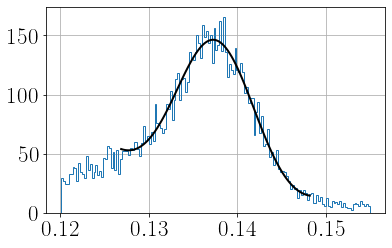

In [105]:
pi0SimInb_forDVCS_CDFT.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [106]:
print(ub_opt, lb_opt)

0.16062514374202225 0.11445279627649525


In [107]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[(pi0SimInb_forDVCS_CDFT.Mpi0<0.161) & (pi0SimInb_forDVCS_CDFT.Mpi0>0.114)]

In [111]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.MM2_egg, bins = np.linspace(0.5, 1.5, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.42940530934547283 96.79727428261504 95
[ 0.82799589  0.27068734 -1.54412048  2.59177634 -0.85693509] 0.3827548333969804 1.4577088117245462 0.42940530934547283
0.28328090601380385 102.4221078640225 95
0.010988028199468092 129.37068292277212 95
0.0018417413880071898 140.00679419705324 95
0.022683423460344132 124.53721764299696 95
0.039537802785190035 120.53792280219014 95
0.17882704007773442 107.53134427583124 95
0.07790345326470005 115.18267522746436 95
0.09075339790666503 113.88430465676892 95
0.29985270665022523 101.72340928264909 95


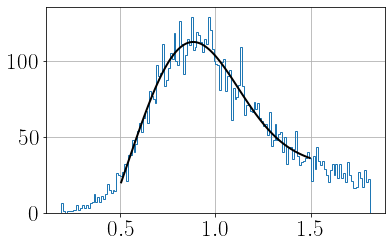

In [112]:
pi0SimInb_forDVCS_CDFT.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [113]:
print(ub_opt, lb_opt)

2.181432598781333 -0.5254408199030607


In [114]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[(pi0SimInb_forDVCS_CDFT.MM2_egg<2.181) & (pi0SimInb_forDVCS_CDFT.MM2_egg>-0.525)]

In [115]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.ME_epgg, bins = np.linspace(-.5, .5, 101))
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.995, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

8.069710500369087e-05 156.01497625743568 95
[ 0.01472781  0.17825657 -0.14333468  0.68076136  1.78231309] -0.27847815767754575 0.4738863110505975 8.069710500369087e-05
0.1326435758700224 110.46421942707951 95
[-0.01562045  0.18382353  0.00548621  1.85107538 -1.40561512] -0.31798325068602834 0.457877584732214 0.1326435758700224
0.03704030898445865 121.02338768899392 95
0.023364254279226393 124.33150036021843 95
0.026016047142194187 123.57732092793925 95
0.3595238488476894 99.35900795568011 95
[-0.00612281  0.18160177 -0.02918531  1.47438498 -0.27951413] -0.3048311466555628 0.46165236253360026 0.3595238488476894
0.023692534907444163 124.23418351614662 95
0.27370396994177615 102.83626998808253 95
0.01355587689288651 128.0085229881415 95
0.18446486327074396 107.21175950722314 95


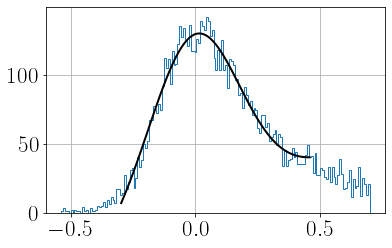

In [116]:
pi0SimInb_forDVCS_CDFT.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [117]:
print(ub_opt, lb_opt)

0.9018860623602526 -0.9141316812381618


In [118]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[(pi0SimInb_forDVCS_CDFT.ME_epgg<0.902) & (pi0SimInb_forDVCS_CDFT.ME_epgg>-0.914)]

In [119]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.4954197899153263 0.002 0.12605336709001752
[ 2.70139074e+00  8.09962934e-03  3.93179126e-02 -2.66761850e+00
  8.56334439e+01 -4.36604090e+02] 0.002 0.12605336709001752 0.4954197899153263
0.006258989678040061 0.002 0.12232537374405147
0.0012390442824843362 0.002 0.12050330809093554
0.06584216402538356 0.002 0.11839290938735092
0.033956114614806854 0.002 0.11865624269003289
0.1732184372112432 0.002 0.11856502437003527
0.18684082809412883 0.002 0.11833860746497316
0.029982553775824372 0.002 0.11890682505810757
0.2805270766839042 0.002 0.11851264890320372
0.09161786154047014 0.002 0.1183483369120309


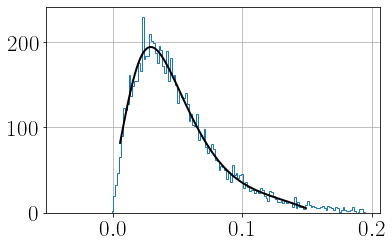

In [120]:
pi0SimInb_forDVCS_CDFT.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [121]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.2046891922322995

In [122]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[(pi0SimInb_forDVCS_CDFT.MPt<0.205)]

In [123]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 0.002 1.1088751636553442
0.5330803525136195 0.002 1.0080065121155088
[ 4.83564736  0.04872202  0.3197615  -0.40429711  1.38909832 -0.84301454] 0.002 1.0080065121155088 0.5330803525136195
0.04869544674583426 0.002 0.9779310517546592
0.2844668292221171 0.002 0.9676890508481666
0.43031844240687156 0.002 0.9706662663914882
0.26749182184035747 0.002 0.9746555288707034
0.3008605705562034 0.002 0.9674867171780485
0.32140860749155975 0.002 0.9712088100830618
0.2820226265042368 0.002 0.9740501148171717
0.20881331128793812 0.002 0.9689941448702406


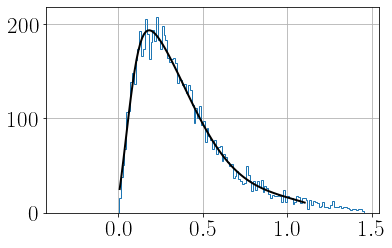

In [124]:
pi0SimInb_forDVCS_CDFT.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [125]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.6475295075350518

In [126]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[(pi0SimInb_forDVCS_CDFT.reconPi<1.648)]

In [127]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimInb_forDVCS_CDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.933785709845951 0.33581542648319407
[ 2.77351428e+00 -3.29760099e-02  1.19036547e-02 -7.95353965e-04] 0 6.933785709845951 0.33581542648319407
0 7.184422618985487 0.6692427078400801
[ 2.87376905e+00 -4.59385085e-03  1.04724108e-03  2.02553817e-04] 0 7.184422618985487 0.6692427078400801
0 7.224266354293206 0.8089265911568165
[ 2.88970654e+00 -4.56537921e-03  5.93733783e-04  2.45821905e-04] 0 7.224266354293206 0.8089265911568165
0 7.2111883662873675 0.7083114039112475
0 7.205061324288572 0.5052365652565329
0 7.210355181249589 0.6418139827514415
0 7.199849693061512 0.5408126918408318
0 7.221985776057224 0.8204154614599746
[ 2.88879431e+00 -4.81854132e-03  6.16743509e-04  2.52366597e-04] 0 7.221985776057224 0.8204154614599746
0 7.215747534125724 0.4719388447315529
0 7.21455000798778 0.6154475963171715


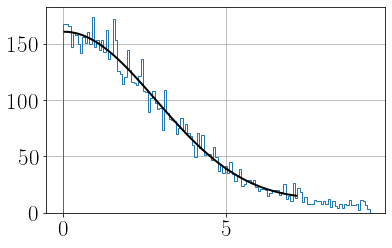

In [128]:
pi0SimInb_forDVCS_CDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [129]:
print(ub_opt)

14.443971552114448


In [130]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[pi0SimInb_forDVCS_CDFT.coplanarity<14.444]

In [131]:
pi0SimInb_forDVCS_CDFT.MM2_epgg.mean()+5*pi0SimInb_forDVCS_CDFT.MM2_epgg.std()

0.04008707013972625

In [132]:
pi0SimInb_forDVCS_CDFT.MM2_epgg.mean()-5*pi0SimInb_forDVCS_CDFT.MM2_epgg.std()

-0.043759768488416936

In [115]:
pi0SimInb_forDVCS_CDFT = pi0SimInb_forDVCS_CDFT.loc[(pi0SimInb_forDVCS_CDFT.MM2_epgg<0.0401) & (pi0SimInb_forDVCS_CDFT.MM2_epgg>-0.0438)]

In [116]:
len(pi0SimInb_forDVCS_CDFT)

8707

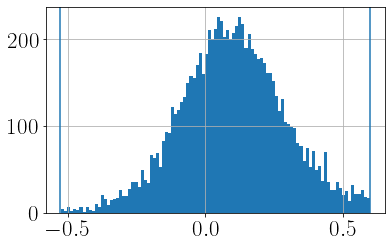

In [160]:
pi0SimInb_forDVCS_CDFT.MM2_ep.hist(bins = 101)
plt.axvline(0.599)
plt.axvline(-0.528)
plt.show()

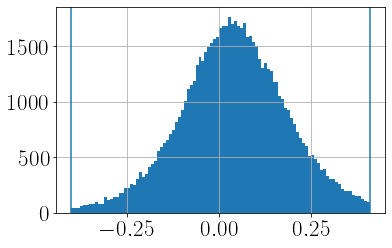

In [161]:
pi0SimInb_forDVCS_CD.MM2_ep.hist(bins = 101)
plt.axvline(0.410)
plt.axvline(-0.401)
plt.show()

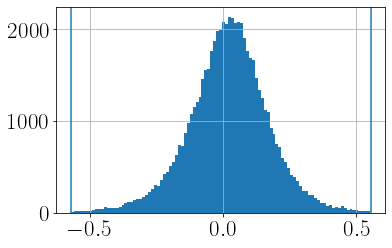

In [163]:
pi0SimInb_forDVCS_FD.MM2_ep.hist(bins = 101)
plt.axvline(0.553)
plt.axvline(-0.569)
plt.show()

In [114]:
cut_Pp1_FD = epgg_3987.Pp > 0.42  # Pp
cut_Psector_FD = epgg_3987.Psector<7
cut_Ptheta_FD = epgg_3987.Ptheta>2.477
cut_Gsector_FD = epgg_3987.Gsector<7
cut_mmep1_FD = epgg_3987["MM2_ep"] < 0.6  # mmep
cut_mmep2_FD = epgg_3987["MM2_ep"] > -0.6  # mmep
cut_mpi01_FD = epgg_3987["Mpi0"] < 0.167  # mpi0
cut_mpi02_FD = epgg_3987["Mpi0"] > 0.105  # mpi0
cut_mmegg1_FD = epgg_3987["MM2_egg"] < 1.801  # mmegg
cut_mmegg2_FD = epgg_3987["MM2_egg"] > -0.120  # mmegg
cut_meepgg1_FD = epgg_3987["ME_epgg"] < 0.792  # meepgg
cut_meepgg2_FD = epgg_3987["ME_epgg"] > -0.813  # meepgg
cut_mpt_FD = epgg_3987["MPt"] < 0.217  # mpt
cut_recon_FD = epgg_3987["reconPi"] < 1.182  # recon gam angle
cut_mmepgg1_FD = np.abs(epgg_3987["MM2_epgg"]) < 0.0254  # mmepgg
cut_mmepgg2_FD = np.abs(epgg_3987["MM2_epgg"]) > -0.0299  # mmepgg

cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD &
            cut_mmep1_FD & cut_mmep2_FD & cut_mpi01_FD & cut_mpi02_FD & 
            cut_mmegg1_FD & cut_mmegg2_FD & cut_meepgg1_FD & cut_meepgg2_FD &
            cut_mpt_FD & cut_recon_FD & cut_mmepgg1_FD & cut_mmepgg2_FD)


#CDFT
cut_Pp1_CDFT = epgg_3987.Pp > 0.3  # Pp
cut_Psector_CDFT = epgg_3987.Psector>7
cut_Ptheta_CDFT = epgg_3987.Ptheta<60
cut_Gsector_CDFT = epgg_3987.Gsector>7
cut_mmep1_CDFT = epgg_3987["MM2_ep"] < 0.6  # mmep
cut_mmep2_CDFT = epgg_3987["MM2_ep"] > -0.6  # mmep
cut_mpi01_CDFT = epgg_3987["Mpi0"] < 0.161  # mpi0
cut_mpi02_CDFT = epgg_3987["Mpi0"] > 0.114  # mpi0
cut_mmegg1_CDFT = epgg_3987["MM2_egg"] < 2.134  # mmegg
cut_mmegg2_CDFT = epgg_3987["MM2_egg"] > -0.364  # mmegg
cut_meepgg1_CDFT = epgg_3987["ME_epgg"] < 0.885  # meepgg
cut_meepgg2_CDFT = epgg_3987["ME_epgg"] > -0.869  # meepgg
cut_mpt_CDFT = epgg_3987["MPt"] < 0.194  # mpt
cut_recon_CDFT = epgg_3987["reconPi"] < 1.481  # recon gam angle
cut_mmepgg1_CDFT = np.abs(epgg_3987["MM2_epgg"]) < 0.0396  # mmepgg
cut_mmepgg2_CDFT = np.abs(epgg_3987["MM2_epgg"]) > -0.0433  # mmepgg

cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT &
            cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mpi01_CDFT & cut_mpi02_CDFT & 
            cut_mmegg1_CDFT & cut_mmegg2_CDFT & cut_meepgg1_CDFT & cut_meepgg2_CDFT &
            cut_mpt_CDFT & cut_recon_CDFT & cut_mmepgg1_CDFT & cut_mmepgg2_CDFT)


#CD
cut_Pp1_CD = epgg_3987.Pp > 0.3  # Pp
cut_Psector_CD = epgg_3987.Psector>7
cut_Ptheta_CD = epgg_3987.Ptheta<60
cut_Gsector_CD = epgg_3987.Gsector<7
cut_mmep1_CD = epgg_3987["MM2_ep"] < 0.6  # mmep
cut_mmep2_CD = epgg_3987["MM2_ep"] > -0.6  # mmep
cut_mpi01_CD = epgg_3987["Mpi0"] < 0.165  # mpi0
cut_mpi02_CD = epgg_3987["Mpi0"] > 0.105  # mpi0
cut_mmegg1_CD = epgg_3987["MM2_egg"] < 2.098  # mmegg
cut_mmegg2_CD = epgg_3987["MM2_egg"] > -0.305  # mmegg
cut_meepgg1_CD = epgg_3987["ME_epgg"] < 0.895  # meepgg
cut_meepgg2_CD = epgg_3987["ME_epgg"] > -0.845  # meepgg
cut_mpt_CD = epgg_3987["MPt"] < 0.196  # mpt
cut_recon_CD = epgg_3987["reconPi"] < 1.101  # recon gam angle
cut_mmepgg1_CD = np.abs(epgg_3987["MM2_epgg"]) < 0.0324  # mmepgg
cut_mmepgg2_CD = np.abs(epgg_3987["MM2_epgg"]) > -0.0276  # mmepgg

cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD &
            cut_mmep1_CD & cut_mmep2_CD & cut_mpi01_CD & cut_mpi02_CD & 
            cut_mmegg1_CD & cut_mmegg2_CD & cut_meepgg1_CD & cut_meepgg2_CD &
            cut_mpt_CD & cut_recon_CD & cut_mmepgg1_CD & cut_mmepgg2_CD)


In [115]:
sum(cut_CD)

364

In [116]:
sum(cut_CDFT)

562

In [117]:
sum(cut_FD)

63

In [230]:
def saveDVCSvars1(self, correction=None):
    #set up dvcs variables
    df_epg = self.df_epg

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg


In [231]:
def saveDVCSvars1(df_epg):
    #set up dvcs variables
    df_epg

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx'], df_epg['Gpy'], df_epg['Gpz']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Gpy"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg


In [232]:
epgg_4076_CDFT = saveDVCSvars1(epgg_4076.loc[(~ epgg_4076.event.isin(pi0SimInb_forDVCS_CDFT.event)) & (epgg_4076.config==3), :])
epgg_4076_CD = saveDVCSvars1(epgg_4076.loc[(~ epgg_4076.event.isin(pi0SimInb_forDVCS_CD.event)) & (epgg_4076.config==2), :])
epgg_4076_FD = saveDVCSvars1(epgg_4076.loc[(~ epgg_4076.event.isin(pi0SimInb_forDVCS_FD.event)) & (epgg_4076.config==1), :])

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [233]:
cut_Pp1_CDFT = epgg_4076_CDFT.Pp > 0.3  # Pp
cut_Psector_CDFT = epgg_4076_CDFT.Psector>7
cut_Ptheta_CDFT = epgg_4076_CDFT.Ptheta<60
cut_Gsector_CDFT = epgg_4076_CDFT.Gsector>7
cut_mmep1_CDFT = epgg_4076_CDFT["MM2_ep"] < 0.597  # mmep
cut_mmep2_CDFT = epgg_4076_CDFT["MM2_ep"] > -0.524  # mmep
cut_mmeg1_CDFT = epgg_4076_CDFT["MM2_eg"] < 1.577  # mmeg
cut_mmeg2_CDFT = epgg_4076_CDFT["MM2_eg"] > 0.240  # mmeg
cut_meepg1_CDFT = epgg_4076_CDFT["ME_epg"] < 0.482 # meepg
cut_meepg2_CDFT = epgg_4076_CDFT["ME_epg"] > -0.438  # meepg
cut_cone1_CDFT = epgg_4076_CDFT["coneAngle"] < 29.606  # coneangle
cut_cone2_CDFT = epgg_4076_CDFT["coneAngle"] > 12.206  # coneangle
cut_mpt_CDFT = epgg_4076_CDFT["MPt"] < 0.0971  # mpt
cut_recon_CDFT = epgg_4076_CDFT["reconGam"] < 0.688  # recon gam angle
cut_coplanarity_CDFT = epgg_4076_CDFT["coplanarity"] < 8.214  # coplanarity angle
cut_mmepg1_CDFT = np.abs(epgg_4076_CDFT["MM2_epg"]) < 0.0122  # mmepg
cut_mmepg2_CDFT = np.abs(epgg_4076_CDFT["MM2_epg"]) > -0.0153  # mmepg

cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT &
            cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mmeg1_CDFT & cut_mmeg2_CDFT &
            cut_meepg1_CDFT & cut_meepg2_CDFT & cut_cone1_CDFT & cut_cone2_CDFT &
            cut_mpt_CDFT & cut_recon_CDFT & cut_coplanarity_CDFT & cut_mmepg1_CDFT & cut_mmepg2_CDFT)

#CD
cut_Pp1_CD = epgg_4076_CD.Pp > 0.3  # Pp
cut_Psector_CD = epgg_4076_CD.Psector>7
cut_Ptheta_CD = epgg_4076_CD.Ptheta<60
cut_Gsector_CD = epgg_4076_CD.Gsector<7
cut_mmep1_CD = epgg_4076_CD["MM2_ep"] < 0.412  # mmep
cut_mmep2_CD = epgg_4076_CD["MM2_ep"] > -0.404  # mmep
cut_mmeg1_CD = epgg_4076_CD["MM2_eg"] < 2.317  # mmeg
cut_mmeg2_CD = epgg_4076_CD["MM2_eg"] > -0.430 # mmeg
cut_meepg1_CD = epgg_4076_CD["ME_epg"] < 1.065  # meepg
cut_meepg2_CD = epgg_4076_CD["ME_epg"] > -0.938  # meepg
cut_cone1_CD = epgg_4076_CD["coneAngle"] < 32.927  # coneangle
cut_cone2_CD = epgg_4076_CD["coneAngle"] > 12.779  # coneangle
cut_mpt_CD = epgg_4076_CD["MPt"] < 0.181  # mpt
cut_recon_CD = epgg_4076_CD["reconGam"] < 0.857  # recon gam angle
cut_coplanarity_CD = epgg_4076_CD["coplanarity"] < 7.845  # coplanarity angle
cut_mmepg1_CD = np.abs(epgg_4076_CD["MM2_epg"]) < 0.0238  # mmepg
cut_mmepg2_CD = np.abs(epgg_4076_CD["MM2_epg"]) > -0.0271  # mmepg

cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD &
            cut_mmep1_CD & cut_mmep2_CD & cut_mmeg1_CD & cut_mmeg2_CD &
            cut_meepg1_CD & cut_meepg2_CD & cut_cone1_CD & cut_cone2_CD &
            cut_mpt_CD & cut_recon_CD & cut_coplanarity_CD & cut_mmepg1_CD & cut_mmepg2_CD)

#FD
cut_Pp1_FD = epgg_4076_FD.Pp > 0.42  # Pp
cut_Psector_FD = epgg_4076_FD.Psector<7
cut_Ptheta_FD = epgg_4076_FD.Ptheta>2.477
cut_Gsector_FD = epgg_4076_FD.Gsector<7
cut_mmep1_FD = epgg_4076_FD["MM2_ep"] < 0.572  # mmep
cut_mmep2_FD = epgg_4076_FD["MM2_ep"] > -0.590  # mmep
cut_mmeg1_FD = epgg_4076_FD["MM2_eg"] < 2.718  # mmeg
cut_mmeg2_FD = epgg_4076_FD["MM2_eg"] > -0.914  # mmeg
cut_meepg1_FD = epgg_4076_FD["ME_epg"] < 1.522  # meepg
cut_meepg2_FD = epgg_4076_FD["ME_epg"] > -1.452  # meepg
cut_cone1_FD = epgg_4076_FD["coneAngle"] < 40.802  # coneangle
cut_cone2_FD = epgg_4076_FD["coneAngle"] > 17.798  # coneangle
cut_mpt_FD = epgg_4076_FD["MPt"] < 0.329  # mpt
cut_recon_FD = epgg_4076_FD["reconGam"] < 1.504  # recon gam angle
cut_coplanarity_FD = 1#epgg_4076_FD["coplanarity"] < 7.822  # coplanarity angle - no cut
cut_mmepg1_FD = np.abs(epgg_4076_FD["MM2_epg"]) < 0.0573  # mmepg
cut_mmepg2_FD = np.abs(epgg_4076_FD["MM2_epg"]) > -0.0626  # mmepg

cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD &
            cut_mmep1_FD & cut_mmep2_FD & cut_mmeg1_FD & cut_mmeg2_FD &
            cut_meepg1_FD & cut_meepg2_FD & cut_cone1_FD & cut_cone2_FD &
            cut_mpt_FD & cut_recon_FD & cut_coplanarity_FD & cut_mmepg1_FD & cut_mmepg2_FD)


In [234]:
sum(cut_CDFT), sum(cut_CD) , len(epgg_4076_FD)

(153, 5944, 45354)

In [201]:
153/len(pi0SimInb_forDVCS_CDFT)

0.017266674190271978

In [224]:
12933*0.235

3039.2549999999997

<AxesSubplot:>

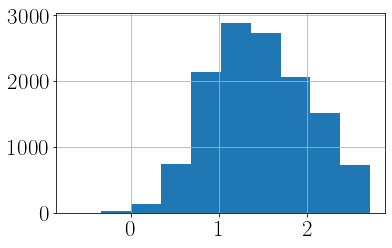

In [221]:
epgg_4076_FD.MM2_eg.hist()

In [199]:
def saveDVCSvars2(df_epg):
    #set up dvcs variables
    df_epg

    ele = [df_epg['Epx'], df_epg['Epy'], df_epg['Epz']]
    df_epg.loc[:, 'Ep'] = mag(ele)
    df_epg.loc[:, 'Ee'] = getEnergy(ele, me)
    df_epg.loc[:, 'Etheta'] = getTheta(ele)
    df_epg.loc[:, 'Ephi'] = getPhi(ele)

    pro = [df_epg['Ppx'], df_epg['Ppy'], df_epg['Ppz']]

    gam = [df_epg['Gpx2'], df_epg['Gpy2'], df_epg['Gpz2']]
    df_epg.loc[:, 'Gp'] = mag(gam)
    df_epg.loc[:, 'Ge'] = getEnergy(gam, 0)
    df_epg.loc[:, 'Gtheta'] = getTheta(gam)
    df_epg.loc[:, 'Gphi'] = getPhi(gam)

    Ppt = mag([df_epg['Ppx'], df_epg['Ppy'], 0])

    VGS = [-df_epg['Epx'], -df_epg['Epy'], pbeam - df_epg['Epz']]
    v3l = cross(beam, ele)
    v3h = cross(pro, VGS)
    v3g = cross(VGS, gam)
    VmissG = [-df_epg["Epx"] - df_epg["Ppx"], -df_epg["Epy"] - df_epg["Ppy"],
              pbeam - df_epg["Epz"] - df_epg["Ppz"]]
    VmissP = [-(df_epg["Epx"] + df_epg["Gpx2"]), -(df_epg["Epy"] + df_epg["Gpy2"]),
              -(-pbeam + df_epg["Epz"] + df_epg["Gpz2"])]
    Vmiss = [-(df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx2"]), -(df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy2"]),
             -(-pbeam + df_epg["Epz"] + df_epg["Ppz"] + df_epg["Gpz2"])]
    costheta = cosTheta(VGS, gam)

    df_epg.loc[:, 'Mpx'], df_epg.loc[:, 'Mpy'], df_epg.loc[:, 'Mpz'] = Vmiss

    # binning kinematics
    df_epg.loc[:,'Q2'] = -((ebeam - df_epg['Ee'])**2 - mag2(VGS))
    df_epg.loc[:,'nu'] = (ebeam - df_epg['Ee'])
    df_epg.loc[:,'y'] = df_epg['nu']/ebeam
    df_epg.loc[:,'xB'] = df_epg['Q2'] / 2.0 / M / df_epg['nu']
    df_epg.loc[:,'t1'] = 2 * M * (df_epg['Pe'] - M)
    df_epg.loc[:,'t2'] = (M * df_epg['Q2'] + 2 * M * df_epg['nu'] * (df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta))\
    / (M + df_epg['nu'] - np.sqrt(df_epg['nu'] * df_epg['nu'] + df_epg['Q2']) * costheta)
    df_epg.loc[:,'W'] = np.sqrt(np.maximum(0, (ebeam + M - df_epg['Ee'])**2 - mag2(VGS)))

    # trento angles
    df_epg.loc[:,'phi1'] = angle(v3l, v3h)
    df_epg.loc[:,'phi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                              df_epg['phi1'], df_epg['phi1'])
    df_epg.loc[:,'phi2'] = angle(v3l, v3g)
    df_epg.loc[:,'phi2'] = np.where(dot(v3l, gam) <
                              0, 360.0 - df_epg['phi2'], df_epg['phi2'])

    # exclusivity variables
    df_epg.loc[:,'MM2_epg'] = (-M - ebeam + df_epg["Ee"] +
                         df_epg["Pe"] + df_epg["Ge"])**2 - mag2(Vmiss)
    df_epg.loc[:,'ME_epg'] = (M + ebeam - df_epg["Ee"] - df_epg["Pe"] - df_epg["Ge"])
    df_epg.loc[:,'MM2_ep'] = (-M - ebeam + df_epg["Ee"] + df_epg["Pe"])**2 - mag2(VmissG)
    df_epg.loc[:,'MM2_eg'] = (-M - ebeam + df_epg["Ee"] + df_epg["Ge"])**2 - mag2(VmissP)
    df_epg.loc[:,'MPt'] = np.sqrt((df_epg["Epx"] + df_epg["Ppx"] + df_epg["Gpx2"])**2 +
                            (df_epg["Epy"] + df_epg["Ppy"] + df_epg["Gpy2"])**2)
    df_epg.loc[:,'coneAngle'] = angle(ele, gam)
    df_epg.loc[:,'reconGam'] = angle(gam, VmissG)
    df_epg.loc[:,'coplanarity'] = angle(v3h, v3g)

    eps = 2*M*df_epg.xB / np.sqrt(df_epg.Q2)
    df_epg.loc[:,'ycol1'] = (df_epg.Q2-df_epg.t2)/(df_epg.Q2-df_epg.xB*df_epg.t2)
    df_epg.loc[:,'ycol2'] = 1 - (1-df_epg.xB)*df_epg.t2/df_epg.Q2
    df_epg.loc[:,'ymax1'] = 2*(np.sqrt(1+eps**2)-1)/(eps**2)
    df_epg.loc[:,'ymax2'] = 1 - (M**2)*(df_epg.xB**2)/df_epg.Q2
    df_epg.loc[:,'tmin1'] = df_epg.Q2*(2*(1-df_epg.xB)*(1-np.sqrt(1+eps**2))+eps**2)/(4*df_epg.xB*(1-df_epg.xB) + eps**2)
    df_epg.loc[:,'tmin2'] = M*M*(df_epg.xB**2)/(1-df_epg.xB+df_epg.xB*M*M/df_epg.Q2)
    df_epg.loc[:,'tcol'] = df_epg.Q2*(df_epg.Q2-2*df_epg.xB*M*ebeam)/df_epg.xB/(df_epg.Q2-2*M*ebeam)

    return df_epg

In [225]:
epgg_4076_CDFT = saveDVCSvars2(epgg_4076.loc[(~ epgg_4076.event.isin(pi0SimInb_forDVCS_CDFT.event)) & (epgg_4076.config==3), :])
epgg_4076_CD = saveDVCSvars2(epgg_4076.loc[(~ epgg_4076.event.isin(pi0SimInb_forDVCS_CD.event)) & (epgg_4076.config==2), :])
epgg_4076_FD = saveDVCSvars2(epgg_4076.loc[(~ epgg_4076.event.isin(pi0SimInb_forDVCS_FD.event)) & (epgg_4076.config==1), :])

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [226]:
cut_Ge = epgg_4076_CDFT["Ge"] > 3  # Ge
cut_Pp1_CDFT = epgg_4076_CDFT.Pp > 0.3  # Pp
cut_Psector_CDFT = epgg_4076_CDFT.Psector>7
cut_Ptheta_CDFT = epgg_4076_CDFT.Ptheta<60
cut_Gsector_CDFT = epgg_4076_CDFT.Gsector>7
cut_mmep1_CDFT = epgg_4076_CDFT["MM2_ep"] < 0.597  # mmep
cut_mmep2_CDFT = epgg_4076_CDFT["MM2_ep"] > -0.524  # mmep
cut_mmeg1_CDFT = epgg_4076_CDFT["MM2_eg"] < 1.577  # mmeg
cut_mmeg2_CDFT = epgg_4076_CDFT["MM2_eg"] > 0.240  # mmeg
cut_meepg1_CDFT = epgg_4076_CDFT["ME_epg"] < 0.482 # meepg
cut_meepg2_CDFT = epgg_4076_CDFT["ME_epg"] > -0.438  # meepg
cut_cone1_CDFT = epgg_4076_CDFT["coneAngle"] < 29.606  # coneangle
cut_cone2_CDFT = epgg_4076_CDFT["coneAngle"] > 12.206  # coneangle
cut_mpt_CDFT = epgg_4076_CDFT["MPt"] < 0.0971  # mpt
cut_recon_CDFT = epgg_4076_CDFT["reconGam"] < 0.688  # recon gam angle
cut_coplanarity_CDFT = epgg_4076_CDFT["coplanarity"] < 8.214  # coplanarity angle
cut_mmepg1_CDFT = np.abs(epgg_4076_CDFT["MM2_epg"]) < 0.0122  # mmepg
cut_mmepg2_CDFT = np.abs(epgg_4076_CDFT["MM2_epg"]) > -0.0153  # mmepg

cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT &
            cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mmeg1_CDFT & cut_mmeg2_CDFT &
            cut_meepg1_CDFT & cut_meepg2_CDFT & cut_cone1_CDFT & cut_cone2_CDFT &
            cut_mpt_CDFT & cut_recon_CDFT & cut_coplanarity_CDFT & cut_mmepg1_CDFT & cut_mmepg2_CDFT)
cut_CDFT = cut_CDFT & cut_Ge

#CD
cut_Ge = epgg_4076_CD["Ge"] > 3  # Ge
cut_Pp1_CD = epgg_4076_CD.Pp > 0.3  # Pp
cut_Psector_CD = epgg_4076_CD.Psector>7
cut_Ptheta_CD = epgg_4076_CD.Ptheta<60
cut_Gsector_CD = epgg_4076_CD.Gsector<7
cut_mmep1_CD = epgg_4076_CD["MM2_ep"] < 0.412  # mmep
cut_mmep2_CD = epgg_4076_CD["MM2_ep"] > -0.404  # mmep
cut_mmeg1_CD = epgg_4076_CD["MM2_eg"] < 2.317  # mmeg
cut_mmeg2_CD = epgg_4076_CD["MM2_eg"] > -0.430 # mmeg
cut_meepg1_CD = epgg_4076_CD["ME_epg"] < 1.065  # meepg
cut_meepg2_CD = epgg_4076_CD["ME_epg"] > -0.938  # meepg
cut_cone1_CD = epgg_4076_CD["coneAngle"] < 32.927  # coneangle
cut_cone2_CD = epgg_4076_CD["coneAngle"] > 12.779  # coneangle
cut_mpt_CD = epgg_4076_CD["MPt"] < 0.181  # mpt
cut_recon_CD = epgg_4076_CD["reconGam"] < 0.857  # recon gam angle
cut_coplanarity_CD = epgg_4076_CD["coplanarity"] < 7.845  # coplanarity angle
cut_mmepg1_CD = np.abs(epgg_4076_CD["MM2_epg"]) < 0.0238  # mmepg
cut_mmepg2_CD = np.abs(epgg_4076_CD["MM2_epg"]) > -0.0271  # mmepg

cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD &
            cut_mmep1_CD & cut_mmep2_CD & cut_mmeg1_CD & cut_mmeg2_CD &
            cut_meepg1_CD & cut_meepg2_CD & cut_cone1_CD & cut_cone2_CD &
            cut_mpt_CD & cut_recon_CD & cut_coplanarity_CD & cut_mmepg1_CD & cut_mmepg2_CD)
cut_CD = cut_CD & cut_Ge
#FD
cut_Ge = epgg_4076_FD["Ge"] > 3  # Ge
cut_Pp1_FD = epgg_4076_FD.Pp > 0.42  # Pp
cut_Psector_FD = epgg_4076_FD.Psector<7
cut_Ptheta_FD = epgg_4076_FD.Ptheta>2.477
cut_Gsector_FD = epgg_4076_FD.Gsector<7
cut_mmep1_FD = epgg_4076_FD["MM2_ep"] < 0.572  # mmep
cut_mmep2_FD = epgg_4076_FD["MM2_ep"] > -0.590  # mmep
cut_mmeg1_FD = epgg_4076_FD["MM2_eg"] < 2.718  # mmeg
cut_mmeg2_FD = epgg_4076_FD["MM2_eg"] > -0.914  # mmeg
cut_meepg1_FD = epgg_4076_FD["ME_epg"] < 1.522  # meepg
cut_meepg2_FD = epgg_4076_FD["ME_epg"] > -1.452  # meepg
cut_cone1_FD = epgg_4076_FD["coneAngle"] < 40.802  # coneangle
cut_cone2_FD = epgg_4076_FD["coneAngle"] > 17.798  # coneangle
cut_mpt_FD = epgg_4076_FD["MPt"] < 0.329  # mpt
cut_recon_FD = epgg_4076_FD["reconGam"] < 1.504  # recon gam angle
cut_coplanarity_FD = 1#epgg_4076_FD["coplanarity"] < 7.822  # coplanarity angle - no cut
cut_mmepg1_FD = np.abs(epgg_4076_FD["MM2_epg"]) < 0.0573  # mmepg
cut_mmepg2_FD = np.abs(epgg_4076_FD["MM2_epg"]) > -0.0626  # mmepg

cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD &
            cut_mmep1_FD & cut_mmep2_FD & cut_mmeg1_FD & cut_mmeg2_FD &
            cut_meepg1_FD & cut_meepg2_FD & cut_cone1_FD & cut_cone2_FD &
            cut_mpt_FD & cut_recon_FD & cut_coplanarity_FD & cut_mmepg1_FD & cut_mmepg2_FD)
cut_FD = cut_FD & cut_Ge

In [227]:
sum(cut_CDFT), sum(cut_CD) , sum(cut_FD)

(109, 0, 0)

In [229]:
event2 = epgg_4076_CDFT[cut_CDFT].event

In [235]:
event1 = epgg_4076_CDFT[cut_CDFT].event

In [239]:
sum(event1 & event2)

0